In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
!pip install openpyxl --upgrade

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/diploma_data'

input_files_dir = Path(path+'/20220302-Barl-stems-BT')
print(input_files_dir)

# List all Reflection files in the directory
reflection_files = list(input_files_dir.glob('Reflection__*.txt'))
print(len(reflection_files))

all_measurements_df_barl_bt = pd.DataFrame()
all_measurements_df_barl_bt.shape

# Process each file
for file_path in reflection_files:
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Find the start of the spectral data
    start_index = 0
    for i, line in enumerate(lines):
        if '>>>>>Begin Spectral Data<<<<<' in line:
            start_index = i + 1
            break

    # Extract only the measurements to a list
    measurements = [line.strip().split('\t')[1] for line in lines[start_index:] if line.strip()]

    df_measurements = pd.DataFrame(measurements).T

    # Append the current file's measurements to the all_measurements_df
    all_measurements_df_barl_bt = pd.concat([all_measurements_df_barl_bt, df_measurements], ignore_index=True)

# Reset the index of the final DataFrame
all_measurements_df_barl_bt.reset_index(drop=True, inplace=True)

all_measurements_df_barl_bt.shape
all_measurements_df_barl_bt

/content/drive/MyDrive/Colab Notebooks/diploma_data/20220302-Barl-stems-BT
4008


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,"51,58","51,58","51,58","5091,33","-245,71","89,59","-167,33","145,45","141,91","439,94",...,"24,24","47,23","1,45","61,88","33,14","-34,19","-85,4","593,49","593,49","593,49"
1,"-23,69","-23,69","-23,69","-3208,1","-1368,36","477,26","-53,74","40,39","166,29","-308,05",...,"9,15","45,91","-97,07","106,07","-23,02","63,43","118,91","101,6","101,6","101,6"
2,"3,56","3,56","3,56","-1346,23","911,5","116,29","75,51","97,35","-21,65","-229,63",...,"104,29","8,33","-27,92","79,42","37,26","34,95","137,82","-127,21","-127,21","-127,21"
3,"175,03","175,03","175,03","-838,49","128,57","204,06","-382,91","-25,82","92,88","-676,19",...,"18,72","36,94","-120,79","107,31","108,23","-17,77","468,31","-48,8","-48,8","-48,8"
4,"42,56","42,56","42,56","-900,03","700,04","-81,91","-475,39","-52,3","33,7","-298,44",...,"-14,93","87,02","-121,94","119,7","52,16","-10,36","236,93","239,19","239,19","239,19"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,"86,79","86,79","86,79",5891,"1057,25","201,8","186,4","25,69","104,66","-27,2",...,"15,67","25,63","-4,34","105,02","50,05","87,78","324,85","113,6","113,6","113,6"
4004,"-70,67","-70,67","-70,67","2207,51","-545,68","-36,65","479,67","-54,95","236,4","-551,33",...,"-34,39","5,46","-104,01","84,26","16,13","-16,08","325,14","-653,78","-653,78","-653,78"
4005,"-75,7","-75,7","-75,7","-7702,3","-385,69","-112,69","-374,75","266,19","242,98",-20,...,"-2,06","11,44","-42,68","62,94","47,27","6,15","455,71","299,98","299,98","299,98"
4006,"188,87","188,87","188,87","-2792,62","-1796,79","-77,38","-177,53","54,43","-147,71","-239,23",...,"-47,1","46,25","-16,93","52,89","111,57","13,05","-16,91","119,2","119,2","119,2"


In [ ]:
all_measurements_df_barl_bt.to_excel('barl_bt.xlsx')

In [ ]:
input_files_dir = Path(path+'/20220302-Barl-stems-K')

reflection_files = list(input_files_dir.glob('Reflection__*.txt'))
print(len(reflection_files))

all_measurements_df_barl_k = pd.DataFrame()
all_measurements_df_barl_k.shape

for file_path in reflection_files:
    with open(file_path, 'r') as file:
        lines = file.readlines()

    start_index = 0
    for i, line in enumerate(lines):
        if '>>>>>Begin Spectral Data<<<<<' in line:
            start_index = i + 1
            break

    measurements = [line.strip().split('\t')[1] for line in lines[start_index:] if line.strip()]

    df_measurements = pd.DataFrame(measurements).T

    all_measurements_df_barl_k = pd.concat([all_measurements_df_barl_k, df_measurements], ignore_index=True)

all_measurements_df_barl_k.reset_index(drop=True, inplace=True)

all_measurements_df_barl_k.shape
all_measurements_df_barl_k

4000


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,"93,29","93,29","93,29","1207,64","-2002,42","107,24","-74,14","32,18","196,42","304,78",...,"-20,04","39,36","-29,66","108,92","66,18","21,81","168,76","-258,43","-258,43","-258,43"
1,"-61,65","-61,65","-61,65","3645,66","-2085,24","192,75","-518,23","-26,75","86,03","-568,14",...,"21,94","54,81","-33,85","41,3","-26,02","63,85","268,72","289,58","289,58","289,58"
2,"109,43","109,43","109,43","-3000,36","-1034,16","315,79","-137,4","36,82","-45,49","-376,07",...,"-42,73","28,15","91,17","40,31","68,29","35,54","282,47","-81,61","-81,61","-81,61"
3,"-104,22","-104,22","-104,22","6513,78","-499,97","173,29","131,29","29,8","-109,89","-487,31",...,"40,82","56,93","11,72","47,56","94,44","45,91","192,25","242,39","242,39","242,39"
4,"145,06","145,06","145,06","-92,31","-834,21","443,34","-220,38","101,19","128,22","-278,44",...,"125,63","30,57","-14,47","37,95","61,84","104,8","459,43","-73,6","-73,6","-73,6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,"-20,59","-20,59","-20,59","-1914,94","61,48","71,22","9,09","51,43","-149,97","102,77",...,"-31,36","123,31","-318,44","152,66","156,58","109,15","48,76","98,99","98,99","98,99"
3996,"180,1","180,1","180,1","1051,4","22,27","47,86","72,42","288,33","-46,57","95,84",...,"457,91","-64,23","-166,37","112,85","192,24","94,91","-233,09","-404,91","-404,91","-404,91"
3997,"-20,12","-20,12","-20,12","1502,81","60,99","-25,37","25,58","158,85","-171,77","95,84",...,"571,47","204,06","-462,1","105,56","-4,57","152,45","375,17","-75,37","-75,37","-75,37"
3998,"20,22","20,22","20,22","2069,7","22,56","46,62","70,42","47,49","-102,64","128,72",...,"819,24","-122,53","-558,7","104,37","97,19","108,22","-600,97","244,74","244,74","244,74"


In [ ]:
all_measurements_df_barl_k.to_excel('barl_k.xlsx')

In [ ]:
input_files_dir = Path(path+'/20220302-Barl-stems-T')

reflection_files = list(input_files_dir.glob('Reflection__*.txt'))
print(len(reflection_files))

all_measurements_df_barl_t = pd.DataFrame()
all_measurements_df_barl_t.shape

for file_path in reflection_files:
    with open(file_path, 'r') as file:
        lines = file.readlines()

    start_index = 0
    for i, line in enumerate(lines):
        if '>>>>>Begin Spectral Data<<<<<' in line:
            start_index = i + 1
            break

    measurements = [line.strip().split('\t')[1] for line in lines[start_index:] if line.strip()]

    df_measurements = pd.DataFrame(measurements).T

    all_measurements_df_barl_t = pd.concat([all_measurements_df_barl_t, df_measurements], ignore_index=True)

all_measurements_df_barl_t.reset_index(drop=True, inplace=True)

all_measurements_df_barl_t.shape
all_measurements_df_barl_t

2000


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,"100,85","100,85","100,85","4104,45","48,02","12,21","-44,39","-17,51","-226,56","111,02",...,"643,62",-36,"524,45","67,1","75,93","151,32","-52,9","-176,86","-176,86","-176,86"
1,"68,95","68,95","68,95","-89,74","79,29","21,64","34,98","154,69","21,42","60,34",...,"522,38","-19,02","-311,72","186,91",113,"141,61","-63,64","54,77","54,77","54,77"
2,"90,21","90,21","90,21","448,74","41,92","1,62","91,37","112,25","-32,6","125,46",...,"757,74","-196,2","-592,3","137,18","78,91","125,07","-237,22","449,84","449,84","449,84"
3,"57,47","57,47","57,47","869,31","100,39","21,07","53,78","174,38","-51,22","92,49",...,"480,98","-69,34","29,41","52,24","-256,57","101,03","169,42","-46,73","-46,73","-46,73"
4,"55,97","55,97","55,97","-279,47","69,42","-0,29","196,73","-32,17","-125,74","38,95",...,"660,76","97,55","-347,01","72,66","-45,53","130,62","-81,82","-255,73","-255,73","-255,73"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"41,2","41,2","41,2","589,78","78,42","16,21","151,91","208,72","88,27","75,27",...,"564,37","-86,32","-734,24","209,41","187,32","84,43","-414,95","27,13","27,13","27,13"
1996,"-16,17","-16,17","-16,17","-1630,44","7,36","-24,8","-69,67","34,14","-15,65","98,94",...,"1010,2","48,27","97,48","106,11","131,45","160,15","-677,87","355,83","355,83","355,83"
1997,"122,12","122,12","122,12","538,49","-48,23","63,88","46,54","-158,04","-65,94","71,68",...,"500,49","-65,86","-737,6","161,68","176,78","125,74","-557,15","-135,66","-135,66","-135,66"
1998,"3,86","3,86","3,86","3183,18","31,66","69,31","77,51","222,06","-76,19","31,93",...,"316,53","-185,15","-341,96","168,33","65,91","81,81","124,79","-27,64","-27,64","-27,64"


In [ ]:
input_files_dir = Path(path+'/20220302-WiW-stems-BT')

reflection_files = list(input_files_dir.glob('Reflection__*.txt'))
print(len(reflection_files))

all_measurements_df_wiw_bt = pd.DataFrame()
all_measurements_df_wiw_bt.shape

for file_path in reflection_files:
    with open(file_path, 'r') as file:
        lines = file.readlines()

    start_index = 0
    for i, line in enumerate(lines):
        if '>>>>>Begin Spectral Data<<<<<' in line:
            start_index = i + 1
            break

    measurements = [line.strip().split('\t')[1] for line in lines[start_index:] if line.strip()]

    df_measurements = pd.DataFrame(measurements).T

    all_measurements_df_wiw_bt = pd.concat([all_measurements_df_wiw_bt, df_measurements], ignore_index=True)

all_measurements_df_wiw_bt.reset_index(drop=True, inplace=True)

all_measurements_df_wiw_bt.shape
all_measurements_df_wiw_bt

4000


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,"-21,18","-21,18","-21,18","1684,51","-2042,41","309,01","-388,35","4,9","-27,68","-298,44",...,"40,49","32,81","-15,48","74,09","53,94","57,03","126,93","-592,95","-592,95","-592,95"
1,"104,61","104,61","104,61","1130,72","357,15","102,71","-154,4","-91,48","-113,18","117,6",...,"54,34","64,51","71,34","45,83","53,05","-43,37","239,22","40,8","40,8","40,8"
2,"273,94","273,94","273,94","-4716,26","-991,32","135,29","101,36","199,91","51,24","328,77",...,"2,23","102,64","14,61","15,57","192,82","9,85","301,08","-272,84","-272,84","-272,84"
3,"221,35","221,35","221,35","1353,78","-959,89","180,99","-511,43","105,96","149,03","-102,41",...,"63,32","76,29","94,93","144,79","112,13","-12,13","183,37","524,72","524,72","524,72"
4,"-57,04","-57,04","-57,04","-4185,3","777,2","600,71","511,66","91,12","-35,07","255,99",...,"21,11","14,71","145,89","93,25","69,4","16,17","352,92","191,99","191,99","191,99"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,"-18,24","-18,24","-18,24","4376,21","-1579,73","214,01","-397,87","130,21","90,14","-31,2",...,"81,21","8,79",-80,"104,71","52,39","-47,91","355,5","45,6","45,6","45,6"
3996,"35,64","35,64","35,64","815,36","1205,85","511,18","-93,87","96,16","-36,72","417,55",...,"-13,69","35,51","56,44","137,48","89,65","-2,19","204,56","-1375,14","-1375,14","-1375,14"
3997,"6,08","6,08","6,08","4899,1","-1088,44","172,39","-41,49","112,72","301,58","-386,47",...,"45,93","54,98","-64,38","33,55","64,4","-162,7","521,55","23,2","23,2","23,2"
3998,"-47,18","-47,18","-47,18","1838,34","-1139,85","79,19","-151,68","57,35","179,44","-218,43",...,"61,92","19,25","127,5","55,5","138,95","32,43","242,66","-986,79","-986,79","-986,79"


In [ ]:
input_files_dir = Path(path+'/20220302-WiW-stems-K')

reflection_files = list(input_files_dir.glob('Reflection__*.txt'))
print(len(reflection_files))

all_measurements_df_wiw_k = pd.DataFrame()
all_measurements_df_wiw_k.shape

for file_path in reflection_files:
    with open(file_path, 'r') as file:
        lines = file.readlines()

    start_index = 0
    for i, line in enumerate(lines):
        if '>>>>>Begin Spectral Data<<<<<' in line:
            start_index = i + 1
            break

    measurements = [line.strip().split('\t')[1] for line in lines[start_index:] if line.strip()]

    df_measurements = pd.DataFrame(measurements).T

    all_measurements_df_wiw_k = pd.concat([all_measurements_df_wiw_k, df_measurements], ignore_index=True)

all_measurements_df_wiw_k.reset_index(drop=True, inplace=True)

all_measurements_df_wiw_k.shape
all_measurements_df_wiw_k

4004


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,"104,82","104,82","104,82","-1815,52","-879,91","38,01","-699,08","-36,55","233,39","-73,6",...,"45,19","13,1","235,66","28,03","157,98","-0,34","253,26","220,79","220,79","220,79"
1,"69,4","69,4","69,4","-3854,43","562,88","388,61","-399,23","-3,58","-32,06","-426,48",...,"31,25","53,95","5,35","43,35","98,44","97,47","7,74","-362,46","-362,46","-362,46"
2,"212,75","212,75","212,75","2884,31","-2076,68","234,82","-178,89","71,12","129,04","-109,61",...,"-12,62","20,63","-3,33","119,46","31,25","-62,56","130,37","-122,41","-122,41","-122,41"
3,"143,18","143,18","143,18","-3854,43","-1905,32","374,14","221,1","-7,81","103,84","443,94",...,"29,93","39,24","35,45","120,7","55,72","77,25","374,39",-4,-4,-4
4,"76,94","76,94","76,94","1961,4","-88,57","-14,93","-532,51","46,75","293,36","-589,75",...,"2,56","38,55","-41,52","92,19","17,9","-43,03","247,24","50,4","50,4","50,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,"-31,13","-31,13","-31,13","-1422,83","44,44","78,84","11,56","54,93","-33,71","104,08",...,"82,25","5,52","313,47","97,27","30,06","139,56","-599,32","-319,02","-319,02","-319,02"
4000,"25,68","25,68","25,68","-448,69","54,12","15,16","61,48","132,82","83,24","32,58",...,"756,56","114,31","-509,98","56,8","78,56","134,83","-133,07","-361,21","-361,21","-361,21"
4001,"94,92","94,92","94,92","330,78","15,4","111,24","167,47","48,8","95,16","23,44",...,"378,05","-6,75","-577,18","132,62","92,62","143,05","-238,87","-39,7","-39,7","-39,7"
4002,"-38,55","-38,55","-38,55","-107,69","106,29","29,94","179,02","152,72","-36,88","124,89",...,"668,45","103,48","-935,8","184,64","181,7","114,85","338,81","99,5","99,5","99,5"


In [ ]:
input_files_dir = Path(path+'/20220302-WiW-stems-T')

reflection_files = list(input_files_dir.glob('Reflection__*.txt'))
print(len(reflection_files))

all_measurements_df_wiw_t = pd.DataFrame()
all_measurements_df_wiw_t.shape

for file_path in reflection_files:
    with open(file_path, 'r') as file:
        lines = file.readlines()

    start_index = 0
    for i, line in enumerate(lines):
        if '>>>>>Begin Spectral Data<<<<<' in line:
            start_index = i + 1
            break

    measurements = [line.strip().split('\t')[1] for line in lines[start_index:] if line.strip()]

    df_measurements = pd.DataFrame(measurements).T

    all_measurements_df_wiw_t = pd.concat([all_measurements_df_wiw_t, df_measurements], ignore_index=True)

all_measurements_df_wiw_t.reset_index(drop=True, inplace=True)

all_measurements_df_wiw_t.shape
all_measurements_df_wiw_t

2010


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,"37,68","37,68","37,68","-70,48","67,11","-253,97","106,31","530,97","-309,65","-77,23",...,"154,62","-127,54","90,38","1718,31","525,07","-20,29","45,18","175,03","175,03","175,03"
1,"28,06","28,06","28,06","-9,26","-24,35","-150,63","107,36","-40,44","-485,66","113,05",...,"543,83","-217,57","74,41","730,43","254,82","37,04","24,24","62,27","62,27","62,27"
2,"54,16","54,16","54,16","48,71","62,64","-122,69","40,66","367,69","-234,64","78,58",...,"-187,07","47,43","102,82","835,81","65,38","82,71","89,51","94,14","94,14","94,14"
3,"13,02","13,02","13,02","28,9","65,53","-185,84","160,96","-142,63","-752,12","-41,5",...,"126,85","127,57","123,99","1168,06","-309,58","117,13","23,16","80,85","80,85","80,85"
4,"94,7","94,7","94,7","43,51",90,"-46,35","92,99","344,15","-619,37","102,75",...,"-313,04","-85,88","63,84","492,89","557,77","56,3","28,61","119,38","119,38","119,38"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,"-46,5","-46,5","-46,5","75,01","620,29","247,4","71,23","68,99","-355,8","-119,91",...,"-51,33","-63,19","30,45","285,86","-8425,83","36,85","265,21","212,77","212,77","212,77"
2006,"-61,17","-61,17","-61,17","97,61","513,85","696,41","92,73","202,97","-170,88","-59,84",...,"-118,84","104,25","67,29","65,7","4599,76","-42,79","274,27","-235,6","-235,6","-235,6"
2007,"19,42","19,42","19,42","8,02","-108,81","-29,31","56,25","243,18","59,09","-7,27",...,"-27,45","80,5","60,89","37,59","5949,6","-120,57","102,21","309,97","309,97","309,97"
2008,"-216,01","-216,01","-216,01","2,3","214,23","-252,62","44,41","194,52","-252,22","39,96",...,"-76,15","43,72","53,67","194,68","1874,96","-86,3","274,94","565,97","565,97","565,97"


In [ ]:
# Marking
all_measurements_df_barl_bt['type'] = 0
all_measurements_df_barl_bt

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,type
0,"51,58","51,58","51,58","5091,33","-245,71","89,59","-167,33","145,45","141,91","439,94",...,"47,23","1,45","61,88","33,14","-34,19","-85,4","593,49","593,49","593,49",0
1,"-23,69","-23,69","-23,69","-3208,1","-1368,36","477,26","-53,74","40,39","166,29","-308,05",...,"45,91","-97,07","106,07","-23,02","63,43","118,91","101,6","101,6","101,6",0
2,"3,56","3,56","3,56","-1346,23","911,5","116,29","75,51","97,35","-21,65","-229,63",...,"8,33","-27,92","79,42","37,26","34,95","137,82","-127,21","-127,21","-127,21",0
3,"175,03","175,03","175,03","-838,49","128,57","204,06","-382,91","-25,82","92,88","-676,19",...,"36,94","-120,79","107,31","108,23","-17,77","468,31","-48,8","-48,8","-48,8",0
4,"42,56","42,56","42,56","-900,03","700,04","-81,91","-475,39","-52,3","33,7","-298,44",...,"87,02","-121,94","119,7","52,16","-10,36","236,93","239,19","239,19","239,19",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,"86,79","86,79","86,79",5891,"1057,25","201,8","186,4","25,69","104,66","-27,2",...,"25,63","-4,34","105,02","50,05","87,78","324,85","113,6","113,6","113,6",0
4004,"-70,67","-70,67","-70,67","2207,51","-545,68","-36,65","479,67","-54,95","236,4","-551,33",...,"5,46","-104,01","84,26","16,13","-16,08","325,14","-653,78","-653,78","-653,78",0
4005,"-75,7","-75,7","-75,7","-7702,3","-385,69","-112,69","-374,75","266,19","242,98",-20,...,"11,44","-42,68","62,94","47,27","6,15","455,71","299,98","299,98","299,98",0
4006,"188,87","188,87","188,87","-2792,62","-1796,79","-77,38","-177,53","54,43","-147,71","-239,23",...,"46,25","-16,93","52,89","111,57","13,05","-16,91","119,2","119,2","119,2",0


In [ ]:
all_measurements_df_barl_k['type'] = 1
all_measurements_df_barl_k

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,type
0,"93,29","93,29","93,29","1207,64","-2002,42","107,24","-74,14","32,18","196,42","304,78",...,"39,36","-29,66","108,92","66,18","21,81","168,76","-258,43","-258,43","-258,43",1
1,"-61,65","-61,65","-61,65","3645,66","-2085,24","192,75","-518,23","-26,75","86,03","-568,14",...,"54,81","-33,85","41,3","-26,02","63,85","268,72","289,58","289,58","289,58",1
2,"109,43","109,43","109,43","-3000,36","-1034,16","315,79","-137,4","36,82","-45,49","-376,07",...,"28,15","91,17","40,31","68,29","35,54","282,47","-81,61","-81,61","-81,61",1
3,"-104,22","-104,22","-104,22","6513,78","-499,97","173,29","131,29","29,8","-109,89","-487,31",...,"56,93","11,72","47,56","94,44","45,91","192,25","242,39","242,39","242,39",1
4,"145,06","145,06","145,06","-92,31","-834,21","443,34","-220,38","101,19","128,22","-278,44",...,"30,57","-14,47","37,95","61,84","104,8","459,43","-73,6","-73,6","-73,6",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,"-20,59","-20,59","-20,59","-1914,94","61,48","71,22","9,09","51,43","-149,97","102,77",...,"123,31","-318,44","152,66","156,58","109,15","48,76","98,99","98,99","98,99",1
3996,"180,1","180,1","180,1","1051,4","22,27","47,86","72,42","288,33","-46,57","95,84",...,"-64,23","-166,37","112,85","192,24","94,91","-233,09","-404,91","-404,91","-404,91",1
3997,"-20,12","-20,12","-20,12","1502,81","60,99","-25,37","25,58","158,85","-171,77","95,84",...,"204,06","-462,1","105,56","-4,57","152,45","375,17","-75,37","-75,37","-75,37",1
3998,"20,22","20,22","20,22","2069,7","22,56","46,62","70,42","47,49","-102,64","128,72",...,"-122,53","-558,7","104,37","97,19","108,22","-600,97","244,74","244,74","244,74",1


In [ ]:
all_measurements_df_barl_t['type'] = 2
all_measurements_df_barl_t

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,type
0,"100,85","100,85","100,85","4104,45","48,02","12,21","-44,39","-17,51","-226,56","111,02",...,-36,"524,45","67,1","75,93","151,32","-52,9","-176,86","-176,86","-176,86",2
1,"68,95","68,95","68,95","-89,74","79,29","21,64","34,98","154,69","21,42","60,34",...,"-19,02","-311,72","186,91",113,"141,61","-63,64","54,77","54,77","54,77",2
2,"90,21","90,21","90,21","448,74","41,92","1,62","91,37","112,25","-32,6","125,46",...,"-196,2","-592,3","137,18","78,91","125,07","-237,22","449,84","449,84","449,84",2
3,"57,47","57,47","57,47","869,31","100,39","21,07","53,78","174,38","-51,22","92,49",...,"-69,34","29,41","52,24","-256,57","101,03","169,42","-46,73","-46,73","-46,73",2
4,"55,97","55,97","55,97","-279,47","69,42","-0,29","196,73","-32,17","-125,74","38,95",...,"97,55","-347,01","72,66","-45,53","130,62","-81,82","-255,73","-255,73","-255,73",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"41,2","41,2","41,2","589,78","78,42","16,21","151,91","208,72","88,27","75,27",...,"-86,32","-734,24","209,41","187,32","84,43","-414,95","27,13","27,13","27,13",2
1996,"-16,17","-16,17","-16,17","-1630,44","7,36","-24,8","-69,67","34,14","-15,65","98,94",...,"48,27","97,48","106,11","131,45","160,15","-677,87","355,83","355,83","355,83",2
1997,"122,12","122,12","122,12","538,49","-48,23","63,88","46,54","-158,04","-65,94","71,68",...,"-65,86","-737,6","161,68","176,78","125,74","-557,15","-135,66","-135,66","-135,66",2
1998,"3,86","3,86","3,86","3183,18","31,66","69,31","77,51","222,06","-76,19","31,93",...,"-185,15","-341,96","168,33","65,91","81,81","124,79","-27,64","-27,64","-27,64",2


In [ ]:
all_measurements_df_wiw_bt['type'] = 3
all_measurements_df_wiw_bt

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,type
0,"-21,18","-21,18","-21,18","1684,51","-2042,41","309,01","-388,35","4,9","-27,68","-298,44",...,"32,81","-15,48","74,09","53,94","57,03","126,93","-592,95","-592,95","-592,95",3
1,"104,61","104,61","104,61","1130,72","357,15","102,71","-154,4","-91,48","-113,18","117,6",...,"64,51","71,34","45,83","53,05","-43,37","239,22","40,8","40,8","40,8",3
2,"273,94","273,94","273,94","-4716,26","-991,32","135,29","101,36","199,91","51,24","328,77",...,"102,64","14,61","15,57","192,82","9,85","301,08","-272,84","-272,84","-272,84",3
3,"221,35","221,35","221,35","1353,78","-959,89","180,99","-511,43","105,96","149,03","-102,41",...,"76,29","94,93","144,79","112,13","-12,13","183,37","524,72","524,72","524,72",3
4,"-57,04","-57,04","-57,04","-4185,3","777,2","600,71","511,66","91,12","-35,07","255,99",...,"14,71","145,89","93,25","69,4","16,17","352,92","191,99","191,99","191,99",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,"-18,24","-18,24","-18,24","4376,21","-1579,73","214,01","-397,87","130,21","90,14","-31,2",...,"8,79",-80,"104,71","52,39","-47,91","355,5","45,6","45,6","45,6",3
3996,"35,64","35,64","35,64","815,36","1205,85","511,18","-93,87","96,16","-36,72","417,55",...,"35,51","56,44","137,48","89,65","-2,19","204,56","-1375,14","-1375,14","-1375,14",3
3997,"6,08","6,08","6,08","4899,1","-1088,44","172,39","-41,49","112,72","301,58","-386,47",...,"54,98","-64,38","33,55","64,4","-162,7","521,55","23,2","23,2","23,2",3
3998,"-47,18","-47,18","-47,18","1838,34","-1139,85","79,19","-151,68","57,35","179,44","-218,43",...,"19,25","127,5","55,5","138,95","32,43","242,66","-986,79","-986,79","-986,79",3


In [ ]:
all_measurements_df_wiw_k['type'] = 4
all_measurements_df_wiw_k

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,type
0,"104,82","104,82","104,82","-1815,52","-879,91","38,01","-699,08","-36,55","233,39","-73,6",...,"13,1","235,66","28,03","157,98","-0,34","253,26","220,79","220,79","220,79",4
1,"69,4","69,4","69,4","-3854,43","562,88","388,61","-399,23","-3,58","-32,06","-426,48",...,"53,95","5,35","43,35","98,44","97,47","7,74","-362,46","-362,46","-362,46",4
2,"212,75","212,75","212,75","2884,31","-2076,68","234,82","-178,89","71,12","129,04","-109,61",...,"20,63","-3,33","119,46","31,25","-62,56","130,37","-122,41","-122,41","-122,41",4
3,"143,18","143,18","143,18","-3854,43","-1905,32","374,14","221,1","-7,81","103,84","443,94",...,"39,24","35,45","120,7","55,72","77,25","374,39",-4,-4,-4,4
4,"76,94","76,94","76,94","1961,4","-88,57","-14,93","-532,51","46,75","293,36","-589,75",...,"38,55","-41,52","92,19","17,9","-43,03","247,24","50,4","50,4","50,4",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,"-31,13","-31,13","-31,13","-1422,83","44,44","78,84","11,56","54,93","-33,71","104,08",...,"5,52","313,47","97,27","30,06","139,56","-599,32","-319,02","-319,02","-319,02",4
4000,"25,68","25,68","25,68","-448,69","54,12","15,16","61,48","132,82","83,24","32,58",...,"114,31","-509,98","56,8","78,56","134,83","-133,07","-361,21","-361,21","-361,21",4
4001,"94,92","94,92","94,92","330,78","15,4","111,24","167,47","48,8","95,16","23,44",...,"-6,75","-577,18","132,62","92,62","143,05","-238,87","-39,7","-39,7","-39,7",4
4002,"-38,55","-38,55","-38,55","-107,69","106,29","29,94","179,02","152,72","-36,88","124,89",...,"103,48","-935,8","184,64","181,7","114,85","338,81","99,5","99,5","99,5",4


In [ ]:
all_measurements_df_wiw_t['type'] = 5
all_measurements_df_wiw_t

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,type
0,"37,68","37,68","37,68","-70,48","67,11","-253,97","106,31","530,97","-309,65","-77,23",...,"-127,54","90,38","1718,31","525,07","-20,29","45,18","175,03","175,03","175,03",5
1,"28,06","28,06","28,06","-9,26","-24,35","-150,63","107,36","-40,44","-485,66","113,05",...,"-217,57","74,41","730,43","254,82","37,04","24,24","62,27","62,27","62,27",5
2,"54,16","54,16","54,16","48,71","62,64","-122,69","40,66","367,69","-234,64","78,58",...,"47,43","102,82","835,81","65,38","82,71","89,51","94,14","94,14","94,14",5
3,"13,02","13,02","13,02","28,9","65,53","-185,84","160,96","-142,63","-752,12","-41,5",...,"127,57","123,99","1168,06","-309,58","117,13","23,16","80,85","80,85","80,85",5
4,"94,7","94,7","94,7","43,51",90,"-46,35","92,99","344,15","-619,37","102,75",...,"-85,88","63,84","492,89","557,77","56,3","28,61","119,38","119,38","119,38",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,"-46,5","-46,5","-46,5","75,01","620,29","247,4","71,23","68,99","-355,8","-119,91",...,"-63,19","30,45","285,86","-8425,83","36,85","265,21","212,77","212,77","212,77",5
2006,"-61,17","-61,17","-61,17","97,61","513,85","696,41","92,73","202,97","-170,88","-59,84",...,"104,25","67,29","65,7","4599,76","-42,79","274,27","-235,6","-235,6","-235,6",5
2007,"19,42","19,42","19,42","8,02","-108,81","-29,31","56,25","243,18","59,09","-7,27",...,"80,5","60,89","37,59","5949,6","-120,57","102,21","309,97","309,97","309,97",5
2008,"-216,01","-216,01","-216,01","2,3","214,23","-252,62","44,41","194,52","-252,22","39,96",...,"43,72","53,67","194,68","1874,96","-86,3","274,94","565,97","565,97","565,97",5


In [ ]:
df = pd.concat([all_measurements_df_barl_bt, all_measurements_df_barl_k, all_measurements_df_barl_t, all_measurements_df_wiw_bt, all_measurements_df_wiw_k, all_measurements_df_wiw_t], ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,type
0,"51,58","51,58","51,58","5091,33","-245,71","89,59","-167,33","145,45","141,91","439,94",...,"47,23","1,45","61,88","33,14","-34,19","-85,4","593,49","593,49","593,49",0
1,"-23,69","-23,69","-23,69","-3208,1","-1368,36","477,26","-53,74","40,39","166,29","-308,05",...,"45,91","-97,07","106,07","-23,02","63,43","118,91","101,6","101,6","101,6",0
2,"3,56","3,56","3,56","-1346,23","911,5","116,29","75,51","97,35","-21,65","-229,63",...,"8,33","-27,92","79,42","37,26","34,95","137,82","-127,21","-127,21","-127,21",0
3,"175,03","175,03","175,03","-838,49","128,57","204,06","-382,91","-25,82","92,88","-676,19",...,"36,94","-120,79","107,31","108,23","-17,77","468,31","-48,8","-48,8","-48,8",0
4,"42,56","42,56","42,56","-900,03","700,04","-81,91","-475,39","-52,3","33,7","-298,44",...,"87,02","-121,94","119,7","52,16","-10,36","236,93","239,19","239,19","239,19",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20017,"-46,5","-46,5","-46,5","75,01","620,29","247,4","71,23","68,99","-355,8","-119,91",...,"-63,19","30,45","285,86","-8425,83","36,85","265,21","212,77","212,77","212,77",5
20018,"-61,17","-61,17","-61,17","97,61","513,85","696,41","92,73","202,97","-170,88","-59,84",...,"104,25","67,29","65,7","4599,76","-42,79","274,27","-235,6","-235,6","-235,6",5
20019,"19,42","19,42","19,42","8,02","-108,81","-29,31","56,25","243,18","59,09","-7,27",...,"80,5","60,89","37,59","5949,6","-120,57","102,21","309,97","309,97","309,97",5
20020,"-216,01","-216,01","-216,01","2,3","214,23","-252,62","44,41","194,52","-252,22","39,96",...,"43,72","53,67","194,68","1874,96","-86,3","274,94","565,97","565,97","565,97",5


In [ ]:
def convert_to_float(df):
    for column in df.columns:
        # Check if the column is of object type (string in pandas)
        if df[column].dtype == 'object':
            try:
                # Convert all string values in the column to float
                df[column] = df[column].str.replace(',', '.').astype(float)
            except ValueError:
                # If conversion fails, pass (leaving non-numeric columns unchanged)
                pass
    return df


df = convert_to_float(df)
df.to_excel('result_all.xlsx')

Start

In [7]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/diploma_data/result_all.xlsx')

In [8]:
# Remove the first column (index)
df = df.iloc[:, 1:]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8, shuffle=True)

How Spectre from a txt files look like

In [ ]:
data_row = y.iloc[2]
data_row

0

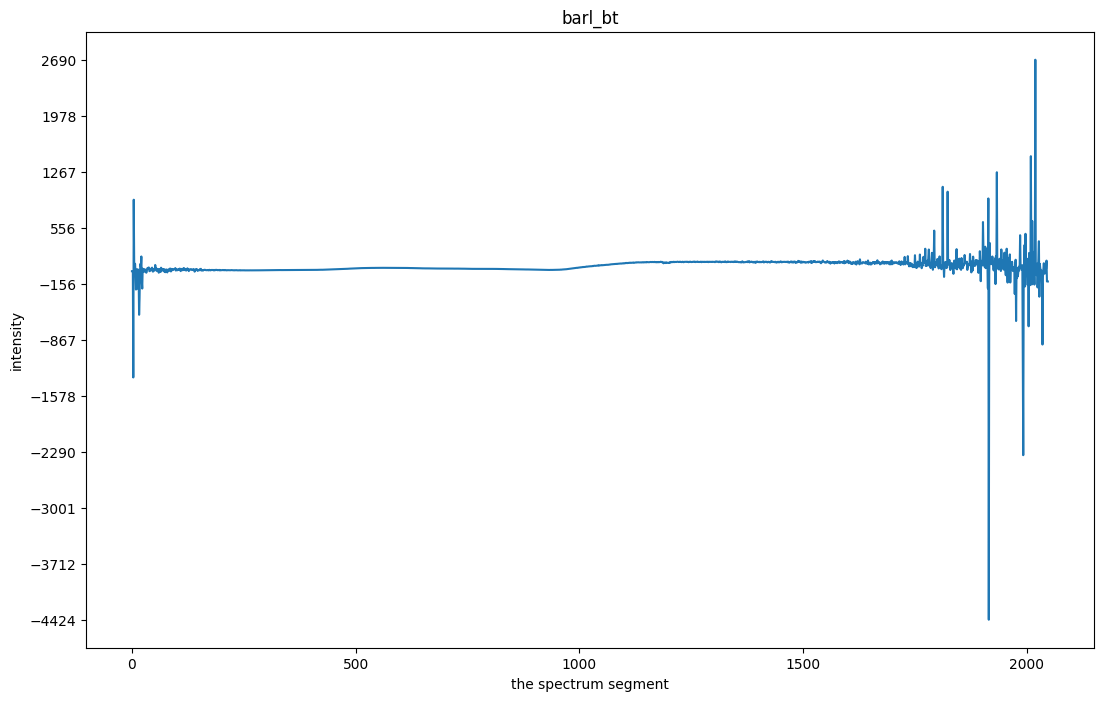

In [ ]:
# Select data from row N
data_row = X.iloc[2]

# Define the intervals for the labels along the Y axis
min_val = min(data_row.values)
max_val = max(data_row.values)
step = (max_val - min_val) / 10

# Graph
plt.figure(figsize=(13, 8))
plt.plot(data_row.values)
plt.title('barl_bt')
plt.xlabel('the spectrum segment')
plt.ylabel('intensity')

plt.yticks(np.arange(min_val, max_val + step, step))

plt.show()

In [ ]:
data_row = y.iloc[6000]
data_row

1

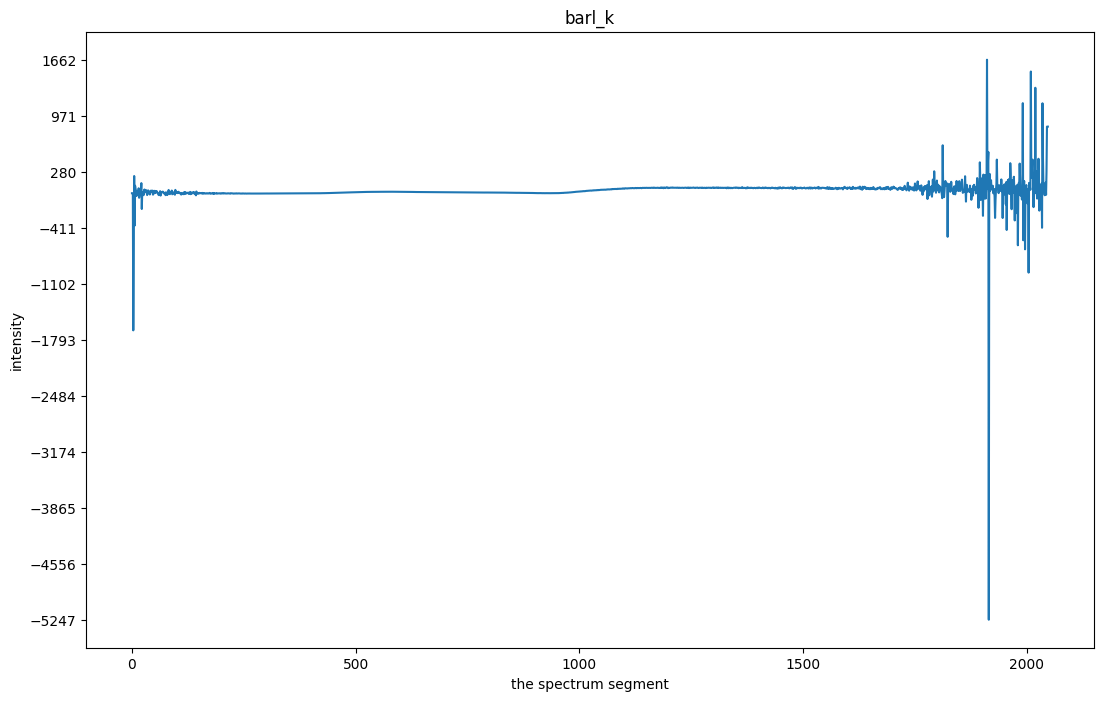

In [ ]:
# Select data from row N
data_row = X.iloc[6000]

# Define the intervals for the labels along the Y axis
min_val = min(data_row.values)
max_val = max(data_row.values)
step = (max_val - min_val) / 10

# Graph
plt.figure(figsize=(13, 8))
plt.plot(data_row.values)
plt.title('barl_k')
plt.xlabel('the spectrum segment')
plt.ylabel('intensity')

plt.yticks(np.arange(min_val, max_val + step, step))

plt.show()

In [ ]:
data_row = y.iloc[10000]
data_row

2

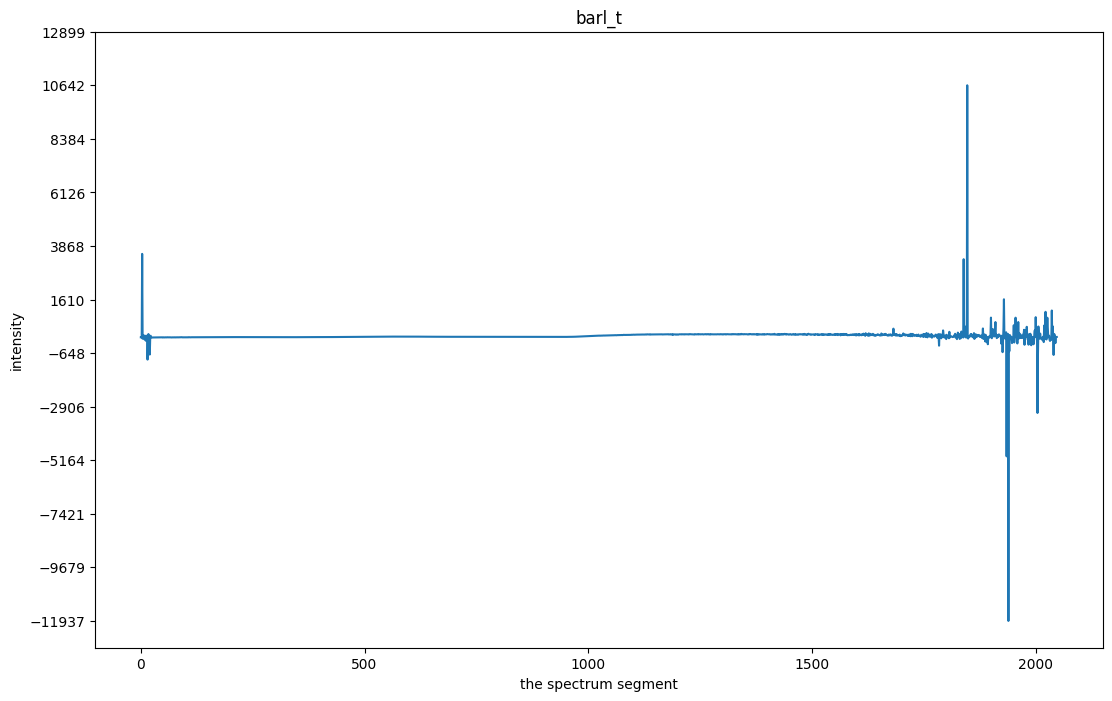

In [ ]:
# Select data from row N
data_row = X.iloc[10000]

# Define the intervals for the labels along the Y axis
min_val = min(data_row.values)
max_val = max(data_row.values)
step = (max_val - min_val) / 10

# Graph
plt.figure(figsize=(13, 8))
plt.plot(data_row.values)
plt.title('barl_t')
plt.xlabel('the spectrum segment')
plt.ylabel('intensity')

plt.yticks(np.arange(min_val, max_val + step, step))

plt.show()

In [ ]:
data_row = y.iloc[12000]
data_row

3

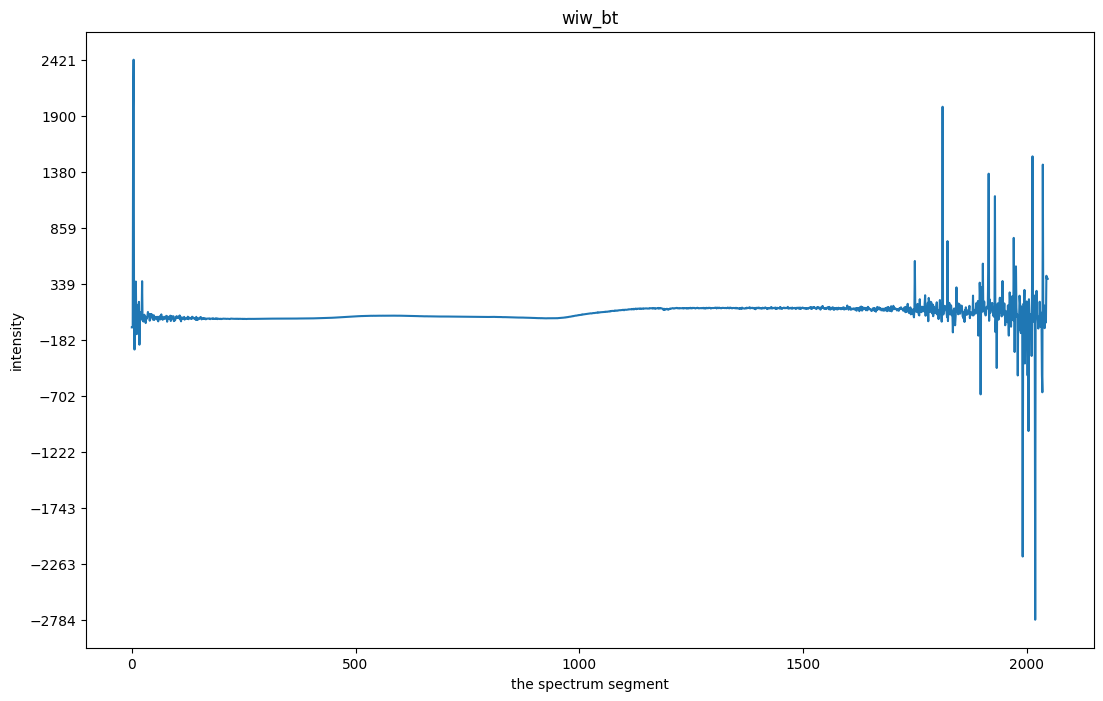

In [ ]:
# Select data from row N
data_row = X.iloc[12000]

# Define the intervals for the labels along the Y axis
min_val = min(data_row.values)
max_val = max(data_row.values)
step = (max_val - min_val) / 10

# Graph
plt.figure(figsize=(13, 8))
plt.plot(data_row.values)
plt.title('wiw_bt')
plt.xlabel('the spectrum segment')
plt.ylabel('intensity')

plt.yticks(np.arange(min_val, max_val + step, step))

plt.show()

In [ ]:
data_row = y.iloc[16000]
data_row

4

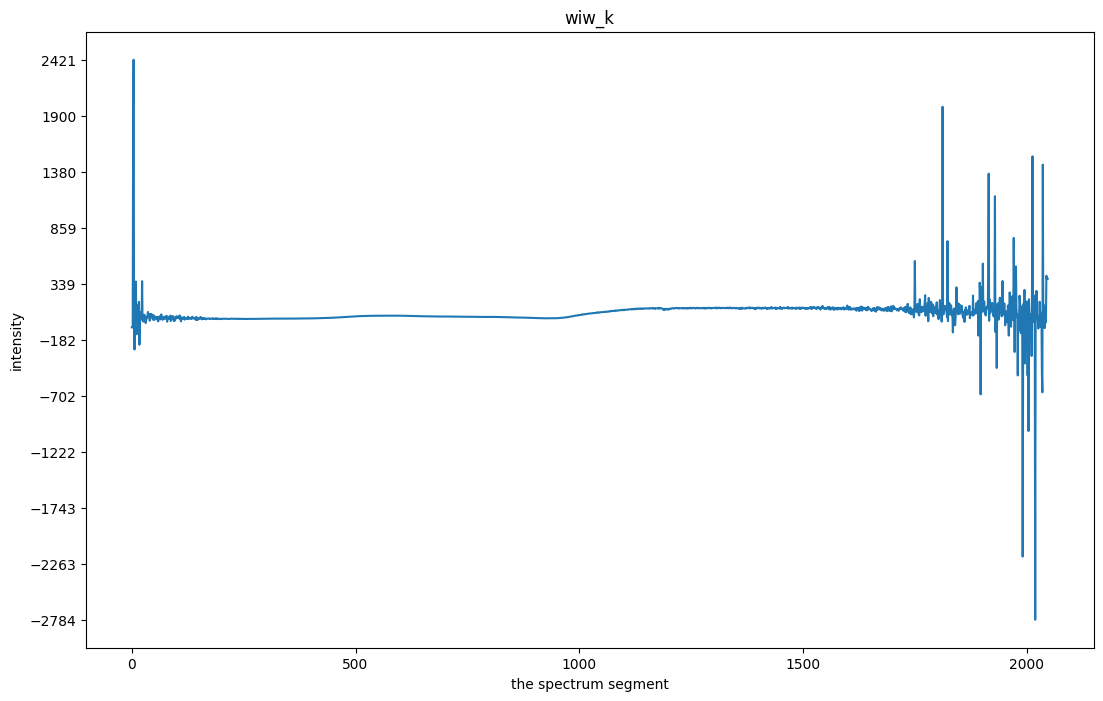

In [ ]:
# Select data from row N
data_row = X.iloc[12000]

# Define the intervals for the labels along the Y axis
min_val = min(data_row.values)
max_val = max(data_row.values)
step = (max_val - min_val) / 10

# Graph
plt.figure(figsize=(13, 8))
plt.plot(data_row.values)
plt.title('wiw_k')
plt.xlabel('the spectrum segment')
plt.ylabel('intensity')

plt.yticks(np.arange(min_val, max_val + step, step))

plt.show()

In [ ]:
data_row = y.iloc[20000]
data_row

5

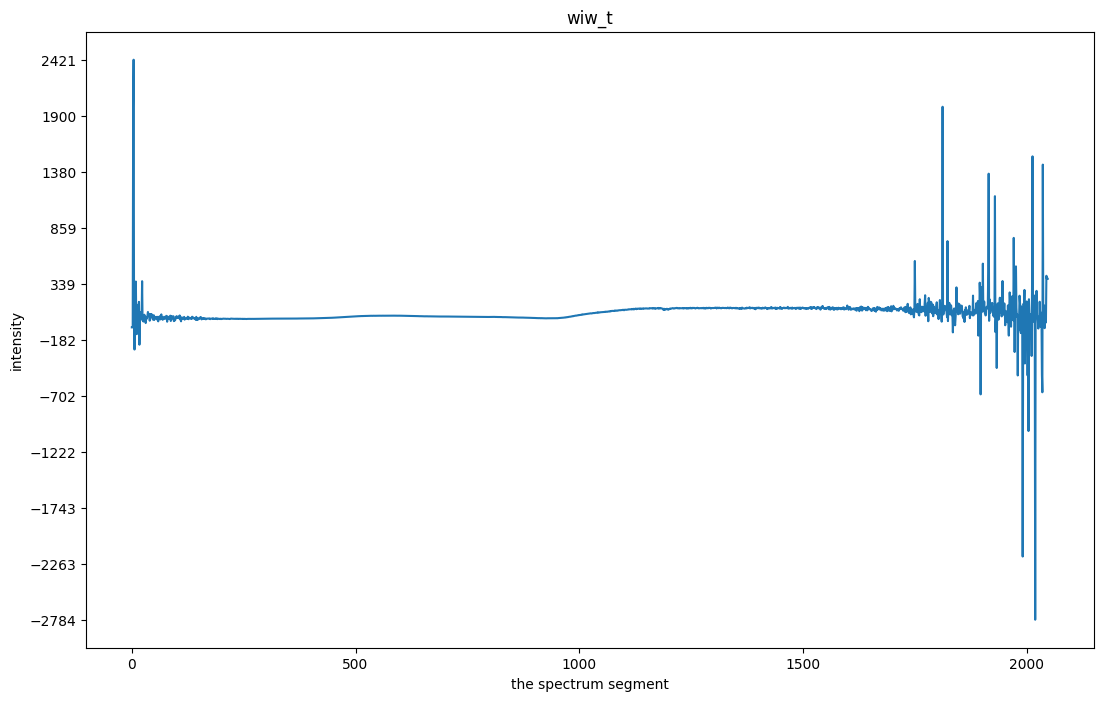

In [ ]:
# Select data from row N
data_row = X.iloc[12000]

# Define the intervals for the labels along the Y axis
min_val = min(data_row.values)
max_val = max(data_row.values)
step = (max_val - min_val) / 10

# Graph
plt.figure(figsize=(13, 8))
plt.plot(data_row.values)
plt.title('wiw_t')
plt.xlabel('the spectrum segment')
plt.ylabel('intensity')

plt.yticks(np.arange(min_val, max_val + step, step))

plt.show()

In [ ]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
count,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,...,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000
mean,36.100529,36.100529,36.100529,493.859502,-447.466497,88.833002,-68.211923,96.155503,-6.930079,-2.648620,...,161.001764,9.666525,-73.556562,96.682978,73.630916,46.432671,107.144918,74.497703,74.497703,74.497703
std,87.092125,87.092125,87.092125,3142.825970,1204.482046,189.188996,272.073923,157.423190,253.739568,302.120493,...,278.170048,87.976490,280.183856,293.601472,307.329078,56.883641,318.196566,360.633882,360.633882,360.633882
min,-393.140000,-393.140000,-393.140000,-14569.730000,-6675.330000,-688.140000,-1289.700000,-618.940000,-2191.920000,-1755.600000,...,-819.920000,-565.360000,-1825.680000,-3052.010000,-8425.830000,-162.700000,-1807.820000,-1678.680000,-1678.680000,-1678.680000
25%,-12.357500,-12.357500,-12.357500,-897.330000,-1088.440000,-14.917500,-214.260000,18.410000,-78.420000,-132.810000,...,0.000000,-15.135000,-97.175000,57.360000,19.350000,3.620000,22.950000,-155.240000,-155.240000,-155.240000
50%,38.030000,38.030000,38.030000,446.150000,12.590000,58.830000,2.860000,71.650000,22.965000,57.310000,...,43.290000,25.910000,-3.470000,84.690000,70.785000,44.390000,160.450000,74.870000,74.870000,74.870000
75%,83.860000,83.860000,83.860000,2176.750000,101.940000,189.130000,90.305000,131.660000,130.410000,122.395000,...,259.150000,55.210000,63.090000,112.890000,120.537500,92.810000,305.307500,274.775000,274.775000,274.775000
max,466.430000,466.430000,466.430000,18302.610000,4845.230000,942.920000,1152.910000,1571.520000,985.310000,1288.240000,...,1512.560000,619.200000,1279.510000,3115.810000,20994.910000,209.540000,1415.050000,1618.310000,1618.310000,1618.310000


In [9]:
# Feature scaling
scaler = MinMaxScaler()
X_train_m = scaler.fit_transform(X_train)
X_test_m = scaler.transform(X_test)

scaler2 = StandardScaler()
X_train_s = scaler2.fit_transform(X_train)
X_test_s = scaler2.transform(X_test)

In [ ]:
# Viewing the first few rows of a MinMax scaled dataset
X_train_m_df = pd.DataFrame(X_train_m)
X_train_m_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
count,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,...,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000,14015.000000
mean,0.468235,0.468235,0.468235,0.457931,0.584011,0.475475,0.516575,0.317022,0.687016,0.575679,...,0.436839,0.486025,0.551650,0.510431,0.305231,0.548824,0.597961,0.531929,0.531929,0.531929
std,0.107149,0.107149,0.107149,0.095395,0.113333,0.116071,0.115603,0.074367,0.080306,0.098881,...,0.124098,0.074797,0.092780,0.048966,0.010761,0.156688,0.100769,0.109295,0.109295,0.109295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.407743,0.407743,0.407743,0.416546,0.525026,0.411309,0.454579,0.280429,0.664872,0.533665,...,0.365033,0.465291,0.543601,0.504110,0.303261,0.430575,0.571489,0.462370,0.462370,0.462370
50%,0.470352,0.470352,0.470352,0.456326,0.626965,0.456734,0.547168,0.305011,0.696610,0.595695,...,0.384240,0.499536,0.574760,0.508559,0.305130,0.544278,0.614338,0.531834,0.531834,0.531834
75%,0.527621,0.527621,0.527621,0.509206,0.635311,0.537577,0.583646,0.333026,0.730440,0.617115,...,0.480386,0.524321,0.596787,0.513211,0.306932,0.675492,0.660728,0.592134,0.592134,0.592134
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Viewing the first few rows of a Standard scaled dataset
X_train_s_df = pd.DataFrame(X_train_s)
X_train_s_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
count,1.401500e+04,1.401500e+04,1.401500e+04,14015.000000,1.401500e+04,1.401500e+04,1.401500e+04,1.401500e+04,1.401500e+04,1.401500e+04,...,1.401500e+04,1.401500e+04,1.401500e+04,1.401500e+04,1.401500e+04,1.401500e+04,1.401500e+04,1.401500e+04,1.401500e+04,1.401500e+04
mean,-4.600910e-17,-4.600910e-17,-4.600910e-17,0.000000,-2.230744e-17,4.512187e-17,2.027949e-17,3.802405e-18,7.097823e-18,-1.825154e-17,...,4.360091e-17,2.382840e-17,-2.332142e-17,1.356191e-17,-4.055899e-18,-9.176471e-17,4.309392e-18,-1.825154e-17,-1.825154e-17,-1.825154e-17
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,...,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-4.370099e+00,-4.370099e+00,-4.370099e+00,-4.800547,-5.153237e+00,-4.096572e+00,-4.468692e+00,-4.263108e+00,-8.555329e+00,-5.822149e+00,...,-3.520227e+00,-6.498151e+00,-5.946002e+00,-1.042449e+01,-2.836618e+01,-3.502776e+00,-5.934213e+00,-4.867087e+00,-4.867087e+00,-4.867087e+00
25%,-5.645838e-01,-5.645838e-01,-5.645838e-01,-0.433848,-5.204725e-01,-5.528367e-01,-5.363041e-01,-4.920791e-01,-2.757650e-01,-4.249160e-01,...,-5.786437e-01,-2.772104e-01,-8.674891e-02,-1.290849e-01,-1.831279e-01,-7.547047e-01,-2.627044e-01,-6.364523e-01,-6.364523e-01,-6.364523e-01
50%,1.975308e-02,1.975308e-02,1.975308e-02,-0.016833,3.790224e-01,-1.614713e-01,2.646553e-01,-1.615221e-01,1.194687e-01,2.024282e-01,...,-4.238670e-01,1.806424e-01,2.490966e-01,-3.822533e-02,-9.418806e-03,-2.901897e-02,1.625277e-01,-8.705925e-04,-8.705925e-04,-8.705925e-04
75%,5.542512e-01,5.542512e-01,5.542512e-01,0.537517,4.526638e-01,5.350525e-01,5.802130e-01,2.152070e-01,5.407468e-01,4.190631e-01,...,3.509138e-01,5.120256e-01,4.865172e-01,5.677324e-02,1.580828e-01,8.084329e-01,6.229063e-01,5.508716e-01,5.508716e-01,5.508716e-01
max,4.963024e+00,4.963024e+00,4.963024e+00,5.682569,3.670633e+00,4.519173e+00,4.181932e+00,9.184237e+00,3.897548e+00,4.291379e+00,...,4.538176e+00,6.871851e+00,4.832580e+00,9.998445e+00,6.456723e+01,2.879550e+00,3.989869e+00,4.282798e+00,4.282798e+00,4.282798e+00


In [ ]:
# Function for visualizing the error matrix for multiclass classification
def plot_confusion_matrix(cm, model_name, classes,
                          cmap='Blues'):
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False, ax=ax, square=True)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classes)) + 0.5
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=45, va="center")
    plt.show()

# Define the class labels according to your data
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

---LogisticRegression---
Accuracy: 0.9683702347261528
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1245
           1       0.99      0.99      0.99      1158
           2       1.00      1.00      1.00       620
           3       0.93      0.93      0.93      1191
           4       0.96      0.99      0.97      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.97      6007
   macro avg       0.97      0.97      0.97      6007
weighted avg       0.97      0.97      0.97      6007



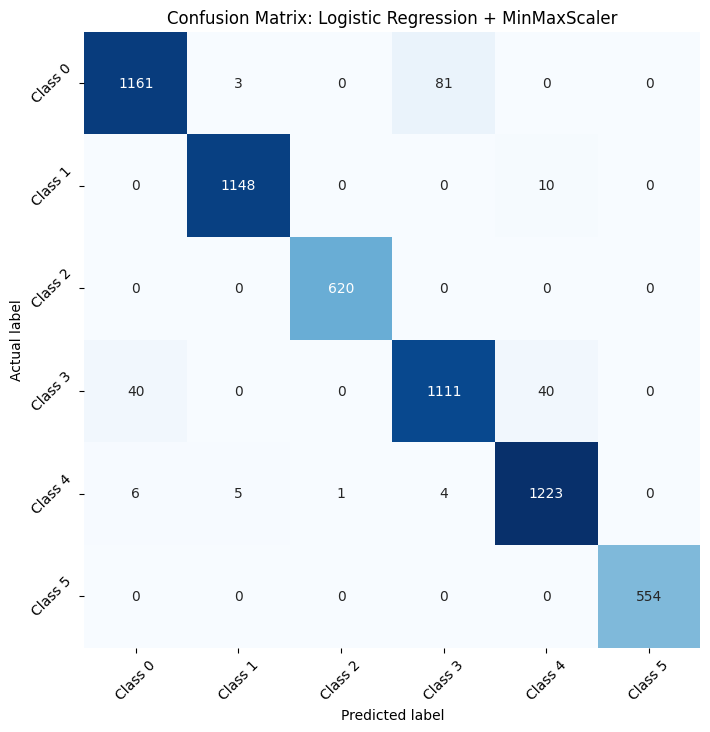

---SVC---
Accuracy: 0.9738638255368737
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.91      0.97      0.94      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.97      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.97      0.97      0.97      6007



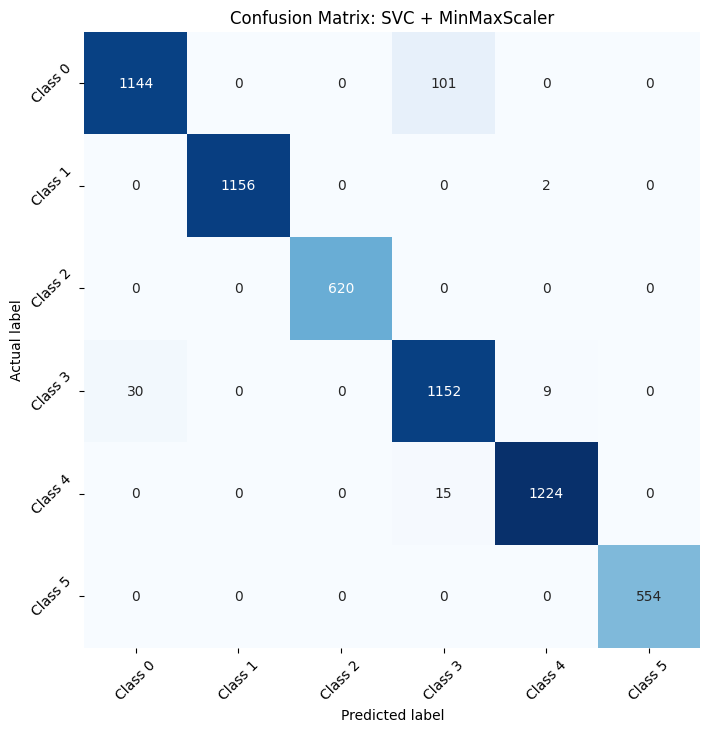

---KNN---
Accuracy: 0.983852172465457
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.95      0.97      0.96      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.98      6007
   macro avg       0.99      0.99      0.99      6007
weighted avg       0.98      0.98      0.98      6007



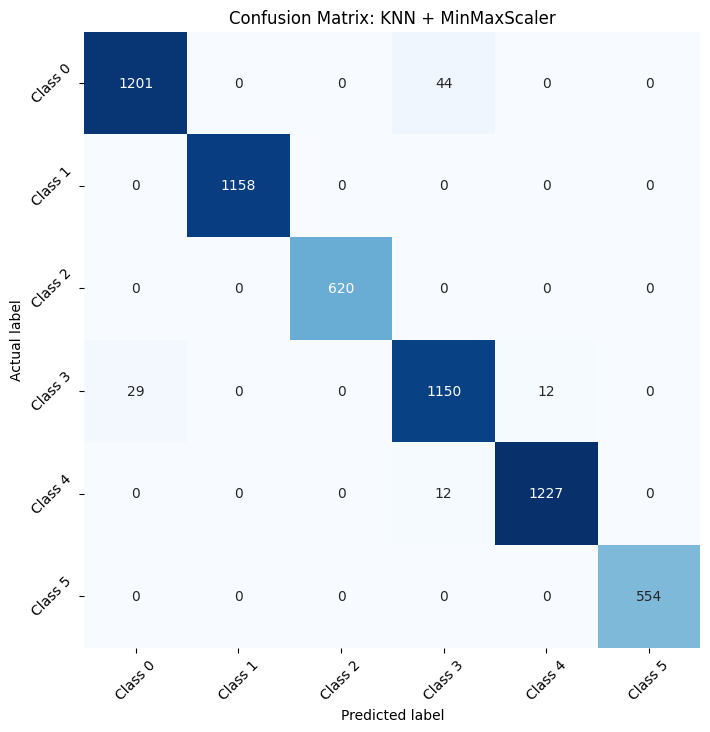

---Gaussian Naive Bayes---
Accuracy: 0.7704344930913933
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71      1245
           1       0.93      0.93      0.93      1158
           2       0.90      0.96      0.93       620
           3       0.51      0.58      0.54      1191
           4       0.71      0.74      0.73      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.77      6007
   macro avg       0.81      0.81      0.81      6007
weighted avg       0.78      0.77      0.77      6007



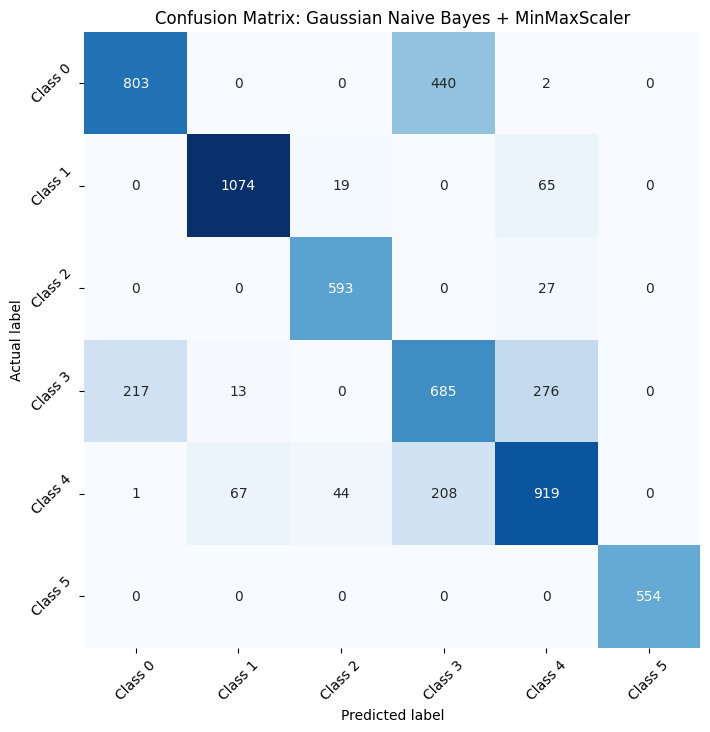

In [ ]:
# Train the classifier with MinMaxScaler

# LogisticRegression
model = LogisticRegression(max_iter = 10000, random_state=8)
model.fit(X_train_m, y_train)
predictions = model.predict(X_test_m)

print("---LogisticRegression---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Logistic Regression + MinMaxScaler', class_labels)

#SVC
model = SVC(random_state=8)
model.fit(X_train_m, y_train)
predictions = model.predict(X_test_m)

print("---SVC---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'SVC + MinMaxScaler', class_labels)

# NearestNeighbors
model = KNeighborsClassifier()
model.fit(X_train_m, y_train)
predictions = model.predict(X_test_m)

print("---KNN---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'KNN + MinMaxScaler', class_labels)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_m, y_train)
predictions = model.predict(X_test_m)

print("---Gaussian Naive Bayes---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Gaussian Naive Bayes + MinMaxScaler', class_labels)

LogisticRegression
Accuracy: 0.977193274513068
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1245
           1       0.99      0.99      0.99      1158
           2       1.00      1.00      1.00       620
           3       0.96      0.95      0.95      1191
           4       0.97      0.99      0.98      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.98      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.98      0.98      0.98      6007



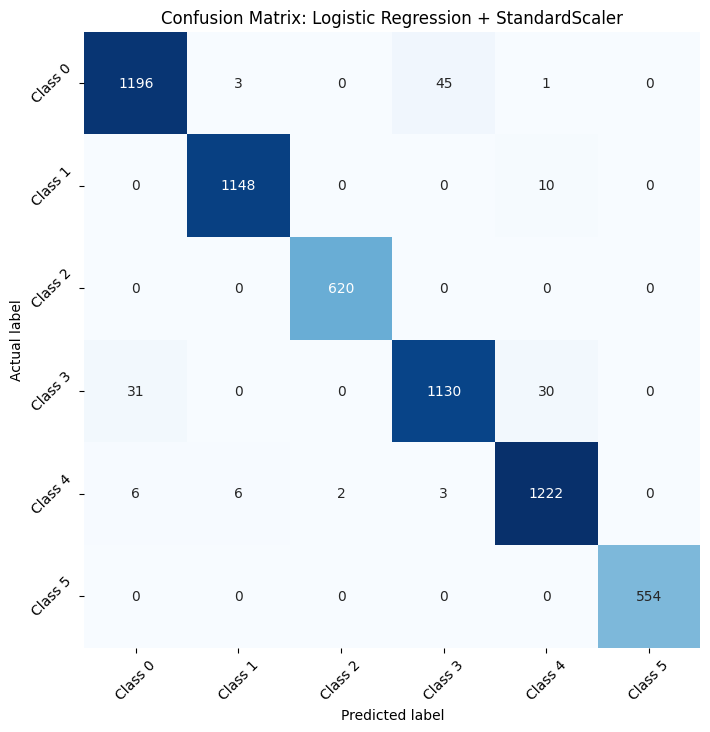

SVC
Accuracy: 0.9736973530880639
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.91      0.97      0.94      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.97      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.97      0.97      0.97      6007



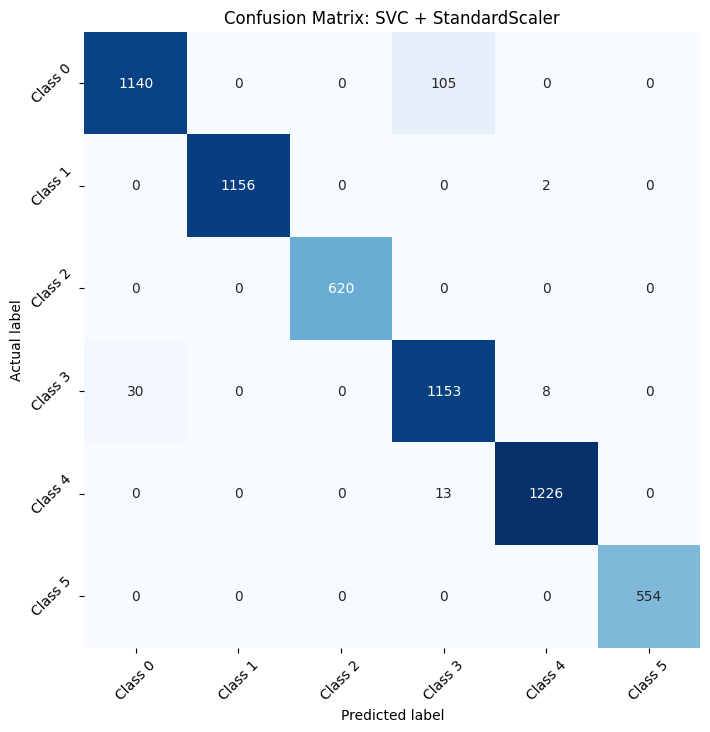

---KNN---
Accuracy: 0.9753620775761611
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1245
           1       0.99      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.93      0.95      0.94      1191
           4       0.98      0.98      0.98      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.98      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.98      0.98      0.98      6007



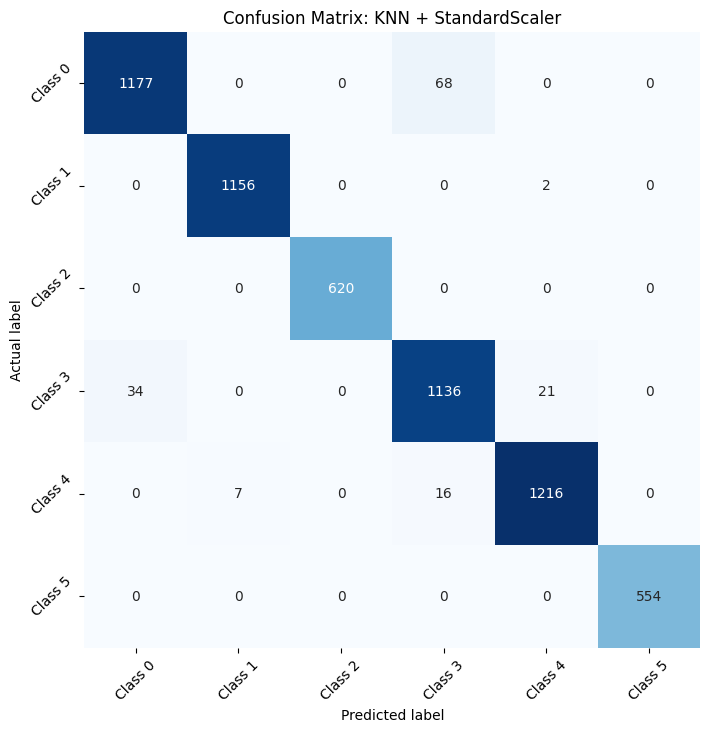

---Gaussian Naive Bayes---
Accuracy: 0.7704344930913933
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71      1245
           1       0.93      0.93      0.93      1158
           2       0.90      0.96      0.93       620
           3       0.51      0.58      0.54      1191
           4       0.71      0.74      0.73      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.77      6007
   macro avg       0.81      0.81      0.81      6007
weighted avg       0.78      0.77      0.77      6007



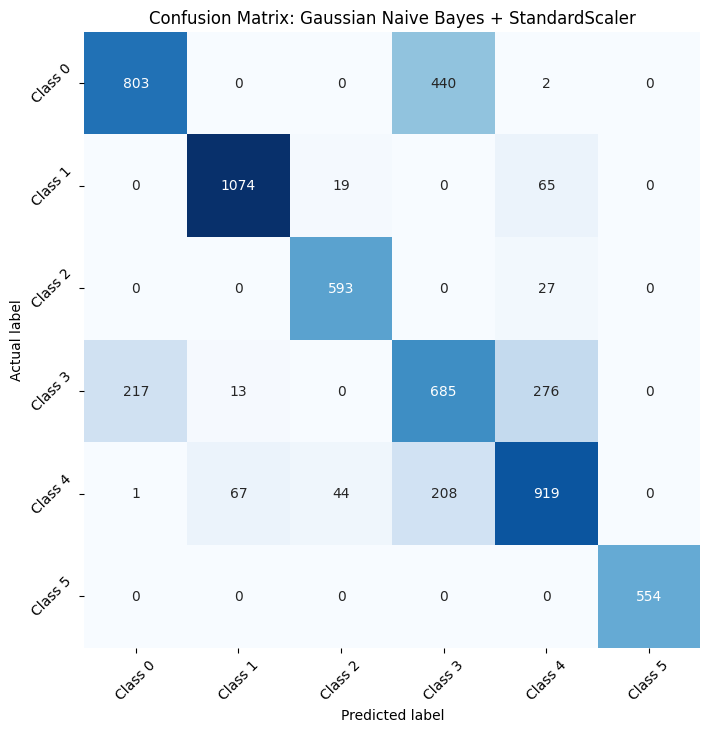

In [ ]:
# Train the classifier with StandardScaler
# LogisticRegression
model = LogisticRegression(max_iter = 10000, random_state=8)
model.fit(X_train_s, y_train)
predictions = model.predict(X_test_s)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Logistic Regression + StandardScaler', class_labels)

#SVC
model = SVC(random_state=8)
model.fit(X_train_s, y_train)
predictions = model.predict(X_test_s)

print("SVC")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'SVC + StandardScaler', class_labels)

# NearestNeighbors
model = KNeighborsClassifier()
model.fit(X_train_s, y_train)
predictions = model.predict(X_test_s)

print("---KNN---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'KNN + StandardScaler', class_labels)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_s, y_train)
predictions = model.predict(X_test_s)

print("---Gaussian Naive Bayes---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Gaussian Naive Bayes + StandardScaler', class_labels)

Search for best PCA parametrs

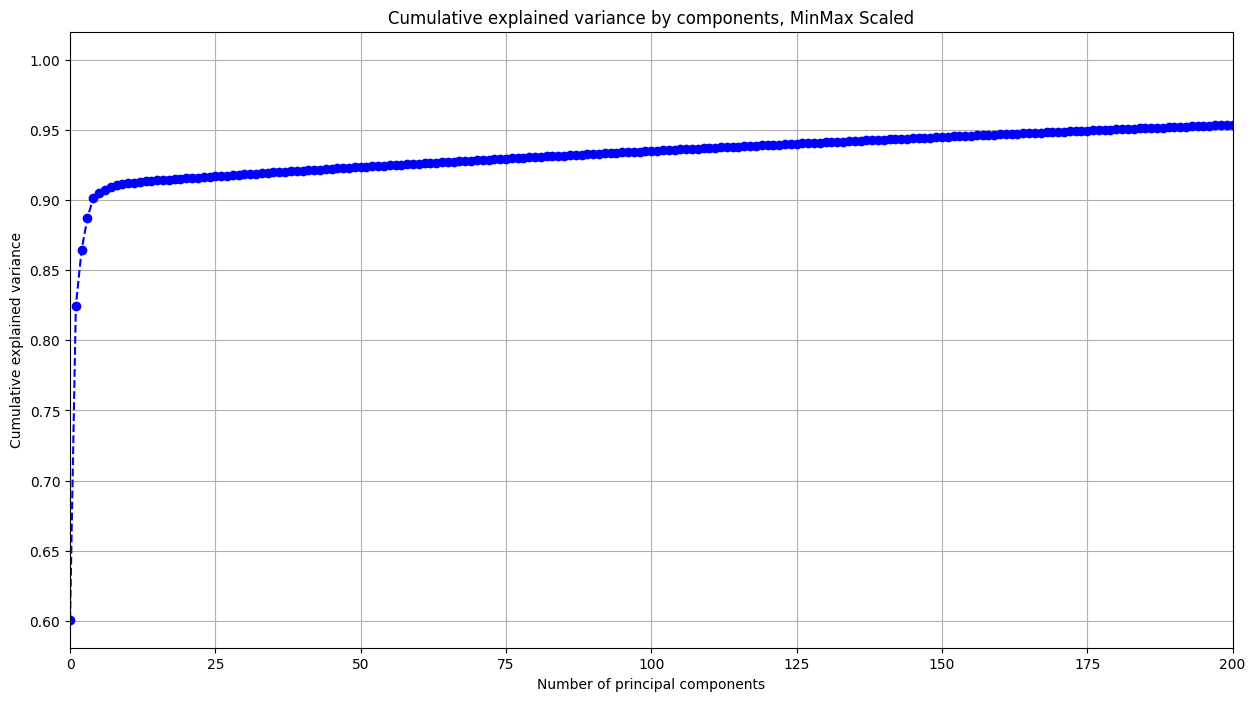

Number of components to explain 95% of the variance: 180


In [ ]:
pca = PCA()
pca.fit(X_train_m)

# Calculation and visualization of cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(15, 8))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative explained variance by components, MinMax Scaled')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.xlim(0, 200)
plt.show()

# Determining the number of components to achieve the desired level of explained variance
desired_variance = 0.95  # Explain 95% of the variance
components_for_desired_variance_m = np.argmax(cumulative_variance >= desired_variance) + 1  # Add 1 because the indices start at 0.
print("Number of components to explain 95% of the variance:", components_for_desired_variance_m)

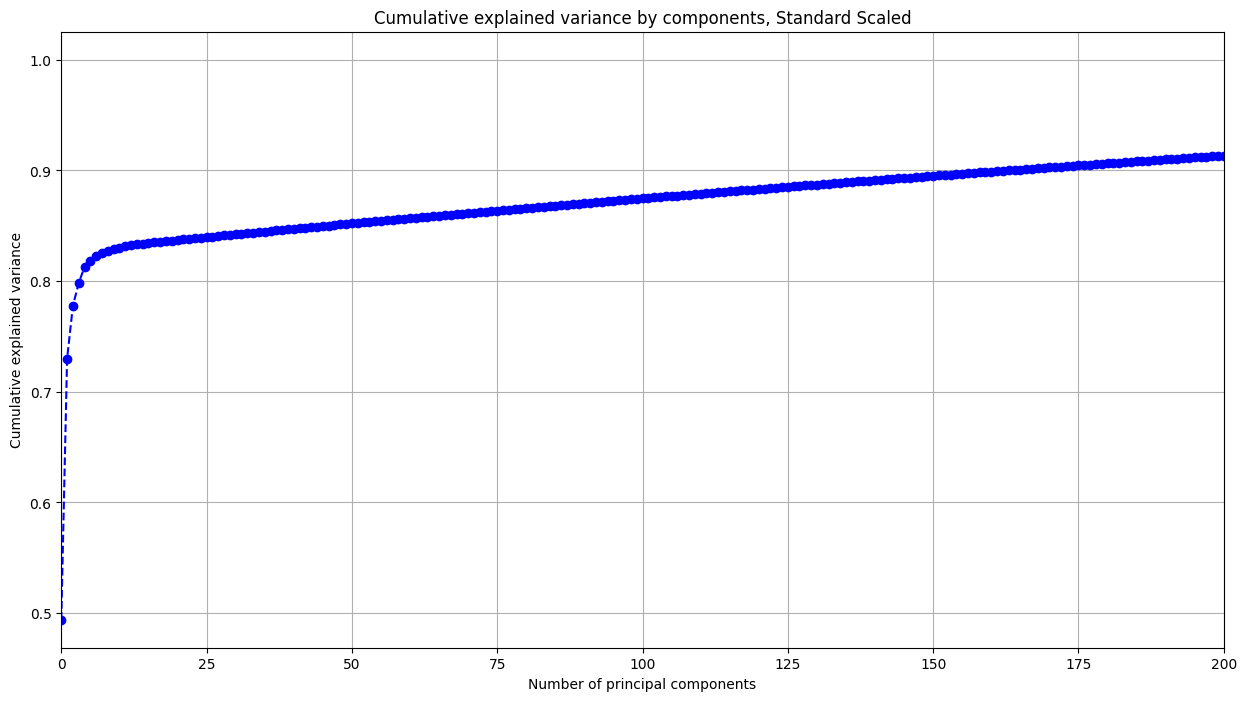

Number of components to explain 95% of the variance: 322


In [ ]:
pca = PCA()
pca.fit(X_train_s)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(15, 8))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative explained variance by components, Standard Scaled')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.xlim(0, 200)
plt.show()

# Определение числа компонент для достижения желаемого уровня объясненной дисперсии
desired_variance = 0.95  # Объяснить 95% дисперсии
components_for_desired_variance_s = np.argmax(cumulative_variance >= desired_variance) + 1  # Прибавляем 1, так как индексы начинаются с 0
print("Number of components to explain 95% of the variance:", components_for_desired_variance_s)

In [ ]:
# Using PCA for MinMaxScaler and StandardScaler Data
pca_m = PCA(n_components=components_for_desired_variance_m, random_state=8)
X_train_pca_m = pca_m.fit_transform(X_train_m)
X_test_pca_m = pca_m.transform(X_test_m)

pca_s = PCA(n_components=components_for_desired_variance_s)
X_train_pca_s = pca_s.fit_transform(X_train_s)
X_test_pca_s = pca_s.transform(X_test_s)

In [ ]:
print("Dimension X_train_pca_m:", X_train_pca_m.shape)
print("Dimension X_train_pca_s:", X_train_pca_s.shape)

Dimension X_train_pca_m: (14015, 180)
Dimension X_train_pca_s: (14015, 322)


Search for best LDA parametrs

Unlike PCA, the maximum number of components that can be selected in LDA is limited to the minimum value of two: the number of classes minus one and the number of traits.

In [ ]:
# Determine the maximum number of LDA components
num_classes = len(np.unique(y_train))  # Number of unique classes
max_components = min(num_classes - 1, X_train_m.shape[1])  # Maximum number of components

par = []
for i in range(max_components):
  par.append(i+1)

n_components = 1

pipeline = Pipeline([
    ('lda', LDA(n_components=n_components)),
    ('classifier', LogisticRegression(max_iter = 10000, random_state=8))
])

# Parameters for GridSearchCV
param_grid = {
    'lda__n_components': par
}

# Create and execute GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_m, y_train)  # Substitute your training dataset

# Output of the best parameters and corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Using the best pipelines for predictions on test data
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test_m)

In [ ]:
# Determine the maximum number of LDA components
num_classes = len(np.unique(y_train))  # Number of unique classes
max_components = min(num_classes - 1, X_train_s.shape[1])  # Maximum number of components

par = []
for i in range(max_components):
  par.append(i+1)

n_components = 1

pipeline = Pipeline([
    ('lda', LDA(n_components=n_components)),
    ('classifier', LogisticRegression(max_iter = 10000, random_state=8))
])

# Parameters for GridSearchCV
param_grid = {
    'lda__n_components': par
}

# Create and execute GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_s, y_train)  # Substitute your training dataset

# Output of the best parameters and corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Using the best pipelines for predictions on test data
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test_s)

In [6]:
# Using LDA for MinMaxScaler and StandardScaler Data
lda_m = LDA(n_components=5)
lda_s = LDA(n_components=5)

X_train_lda_m = lda_m.fit_transform(X_train_m, y_train)
X_test_lda_m = lda_m.transform(X_test_m)

X_train_lda_s = lda_s.fit_transform(X_train_s, y_train)
X_test_lda_s = lda_s.transform(X_test_s)

In [ ]:
print("Dimension X_train_lda_m:", X_train_lda_m.shape)
print("Dimension X_train_lda_s:", X_train_lda_s.shape)

Dimension X_train_lda_m: (14015, 5)
Dimension X_train_lda_s: (14015, 5)


Search for best KernalPCA parametrs

In [ ]:
kernel = 'rbf'
n_components = 2

pipeline = Pipeline([
    ('kernelpca', KernelPCA(kernel=kernel, n_components=n_components)),
    ('classifier', LogisticRegression(max_iter = 20000, random_state=8))
])

# Parameters for GridSearchCV
param_grid = {
    'kernelpca__kernel': ['rbf', 'linear'],
    'kernelpca__n_components': [16, 72, 144, 288, 576]
}

# Create and execute GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_m, y_train)  # Substitute your training dataset

# Output of the best parameters and corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Using the best pipelines for predictions on test data
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test_m)

Best parameters: {'kernelpca__kernel': 'linear', 'kernelpca__n_components': 576}
Best accuracy: 0.9517658013613901


In [ ]:
kernel = 'rbf'
n_components = 2

pipeline = Pipeline([
    ('kernelpca', KernelPCA(kernel=kernel, n_components=n_components)),
    ('classifier', LogisticRegression(max_iter = 20000, random_state=8))
])

# Parameters for GridSearchCV
param_grid = {
    'kernelpca__kernel': ['rbf', 'linear'],
    'kernelpca__n_components': [576, 1152, 2304, 3000]
}

# Create and execute GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_m, y_train)  # Substitute your training dataset

# Output of the best parameters and corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Using the best pipelines for predictions on test data
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test_m)

Best parameters: {'kernelpca__kernel': 'linear', 'kernelpca__n_components': 2304}
Best accuracy: 0.9665358386549299


In [ ]:
kernel = 'rbf'
n_components = 2

pipeline = Pipeline([
    ('kernelpca', KernelPCA(kernel=kernel, n_components=n_components)),
    ('classifier', LogisticRegression(max_iter = 20000, random_state=8))
])

# Parameters for GridSearchCV
param_grid = {
    'kernelpca__kernel': ['rbf', 'linear'],
    'kernelpca__n_components': [16, 144, 576, 1152, 2304, 3000]
}

# Create and execute GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_s, y_train)  # Substitute your training dataset

# Output of the best parameters and corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Using the best pipelines for predictions on test data
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test_s)

Best parameters: {'kernelpca__kernel': 'linear', 'kernelpca__n_components': 3000}
Best accuracy: 0.9693182710644627


In [ ]:
kernel = 'rbf'
n_components = 2

pipeline = Pipeline([
    ('kernelpca', KernelPCA(kernel=kernel, n_components=n_components)),
    ('classifier', LogisticRegression(max_iter = 20000, random_state=8))
])

# Parameters for GridSearchCV
param_grid = {
    'kernelpca__kernel': ['linear'],
    'kernelpca__n_components': [4000, 5000, 6000]
}

# Create and execute GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_s, y_train)  # Substitute your training dataset

# Output of the best parameters and corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Using the best pipelines for predictions on test data
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test_s)

Best parameters: {'kernelpca__kernel': 'linear', 'kernelpca__n_components': 4000}
Best accuracy: 0.9693182710644627


In [ ]:
# Using KernelPCA for MinMaxScaler and StandardScaler Data
kpca_s = KernelPCA(n_components= 3000, kernel='linear')
kpca_m = KernelPCA(n_components=2304, kernel='linear')

X_train_kpca_s = kpca_s.fit_transform(X_train_s)
X_test_kpca_s = kpca_s.transform(X_test_s)

X_train_kpca_m = kpca_m.fit_transform(X_train_m)
X_test_kpca_m = kpca_m.transform(X_test_m)

In [ ]:
print("Dimension X_train_kpca_m:", X_train_kpca_m.shape)
print("Dimension X_train_kpca_s:", X_train_kpca_s.shape)

Dimension X_train_kpca_m: (14015, 2304)
Dimension X_train_kpca_s: (14015, 3000)


Search for best isomap parametrs

In [ ]:
n_neighbors = 2
n_components = 2

pipeline = Pipeline([
    ('isomap', Isomap(n_neighbors=n_neighbors, n_components=n_components)),
    ('classifier', LogisticRegression(max_iter = 10000, random_state=8))
])

# Parameters for GridSearchCV
param_grid = {
    'isomap__n_neighbors': [30, 68, 135, 270],
    'isomap__n_components': [2, 4, 8, 16]
}

# Create and execute GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_m, y_train)  # Substitute your training dataset

# Output of the best parameters and corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Using the best pipelines for predictions on test data
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test_m)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Best parameters: {'isomap__n_components': 16, 'isomap__n_neighbors': 30}
Best accuracy: 0.9471990210282901


In [ ]:
n_neighbors = 2
n_components = 2

pipeline = Pipeline([
    ('isomap', Isomap(n_neighbors=n_neighbors, n_components=n_components)),
    ('classifier', LogisticRegression(max_iter = 10000, random_state=8))
])

# Parameters for GridSearchCV
param_grid = {
    'isomap__n_neighbors': [30, 68],
    'isomap__n_components': [4, 8, 16, 32]
}

# Create and execute GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_s, y_train)  # Substitute your training dataset

# Output of the best parameters and corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Using the best pipelines for predictions on test data
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test_s)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best parameters: {'isomap__n_components': 32, 'isomap__n_neighbors': 30}
Best accuracy: 0.9459862029545452


this code does not execute and executes too slowly when using Isomap on our data

X_train and X_test contain a large number of samples and/or features, executing Isomap can be time consuming due to its O(N^2) complexity in terms of memory and time, where N is the number of samples.

n_components=1000 is very large. Choosing such a large number of components significantly increases the amount of calculations.

n_neighbors=800 is also very large. Isomap uses k-nearest neighbors to construct the graph, and the more n_neighbors, the denser the graph and the higher the computational complexity.

In [ ]:
# Using Isomap for MinMaxScaler and StandardScaler Data
iso_s = Isomap(n_components=32, n_neighbors=30)
iso_m = Isomap(n_components=16, n_neighbors=30)

X_train_iso_s = iso_s.fit_transform(X_train_s)
X_test_iso_s = iso_s.transform(X_test_s)

X_train_iso_m = iso_m.fit_transform(X_train_m)
X_test_iso_m = iso_m.transform(X_test_m)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

In [ ]:
print("Dimension X_train_iso_m:", X_train_iso_m.shape)
print("Dimension X_train_iso_s:", X_train_iso_s.shape)

Dimension X_train_iso_m: (14015, 16)
Dimension X_train_iso_s: (14015, 32)


Train a models with PCA

Min Max Scaled

LogisticRegression
Accuracy: 0.9458964541368403
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1245
           1       0.98      0.99      0.99      1158
           2       1.00      1.00      1.00       620
           3       0.89      0.88      0.88      1191
           4       0.94      0.96      0.95      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.95      6007
   macro avg       0.96      0.96      0.96      6007
weighted avg       0.95      0.95      0.95      6007



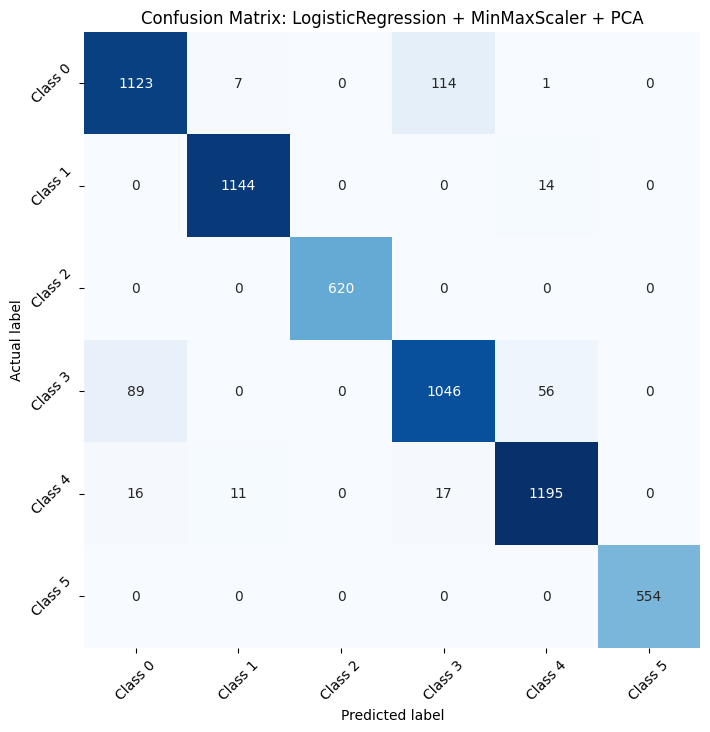

SVC
Accuracy: 0.974196770434493
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.91      0.97      0.94      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.97      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.98      0.97      0.97      6007



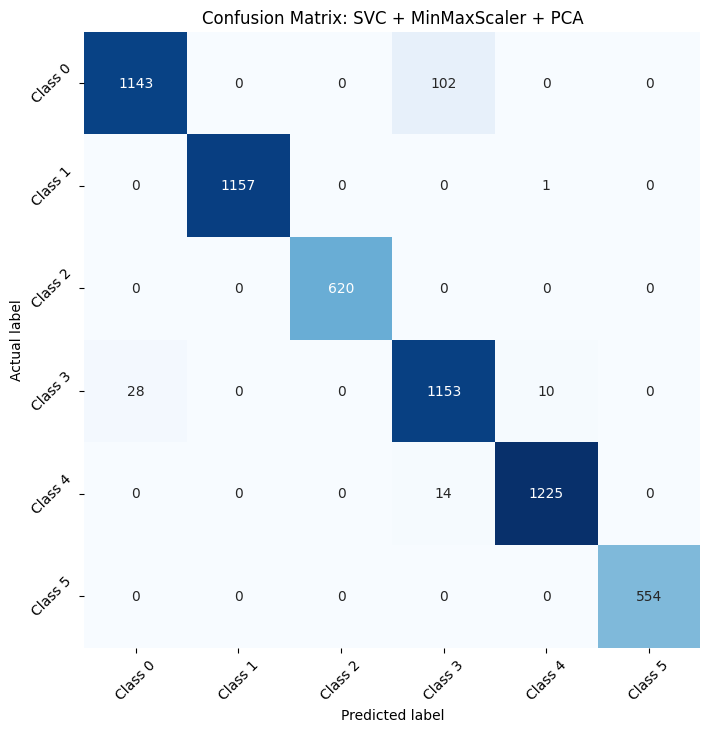

---KNN---
Accuracy: 0.9860163142999834
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.96      0.97      0.96      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.99      6007
   macro avg       0.99      0.99      0.99      6007
weighted avg       0.99      0.99      0.99      6007



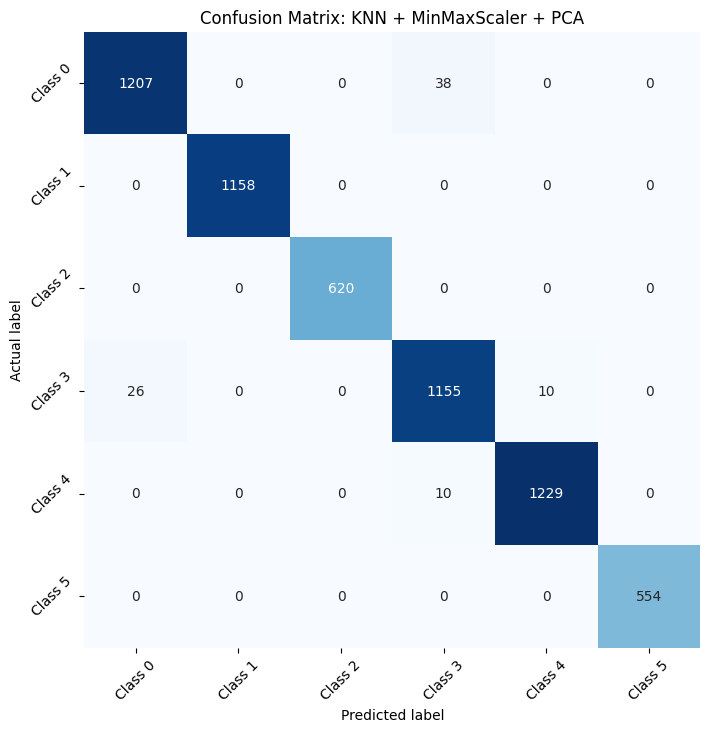

---Gaussian Naive Bayes---
Accuracy: 0.8353587481271849
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1245
           1       0.96      0.92      0.94      1158
           2       0.87      1.00      0.93       620
           3       0.71      0.86      0.78      1191
           4       0.84      0.64      0.72      1239
           5       0.93      0.99      0.96       554

    accuracy                           0.84      6007
   macro avg       0.85      0.86      0.85      6007
weighted avg       0.84      0.84      0.83      6007



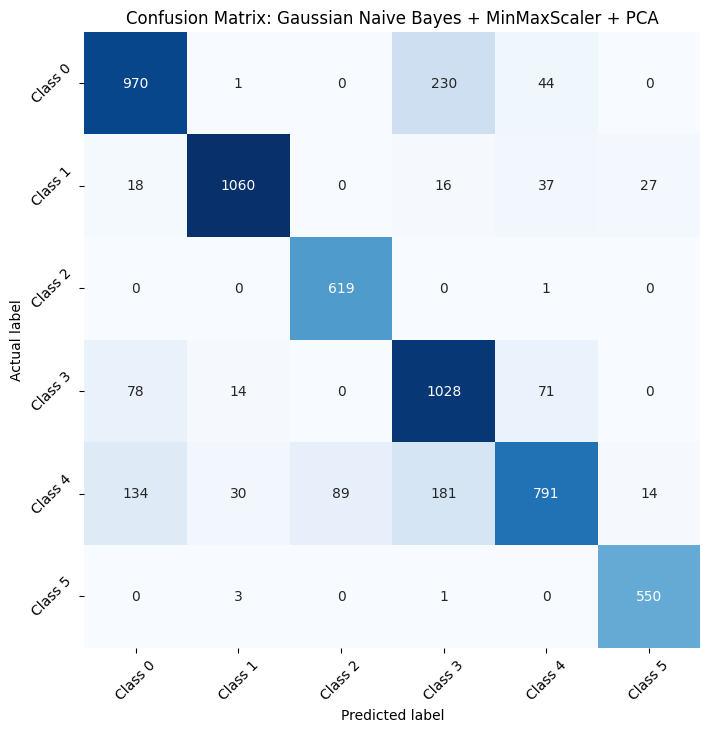

In [ ]:
# LogisticRegression
model = LogisticRegression(max_iter = 10000, random_state=8)
model.fit(X_train_pca_m, y_train)
predictions = model.predict(X_test_pca_m)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'LogisticRegression + MinMaxScaler + PCA', class_labels)

#SVC
model = SVC(random_state=8)
model.fit(X_train_pca_m, y_train)
predictions = model.predict(X_test_pca_m)

print("SVC")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'SVC + MinMaxScaler + PCA', class_labels)

# NearestNeighbors
model = KNeighborsClassifier()
model.fit(X_train_pca_m, y_train)
predictions = model.predict(X_test_pca_m)

print("---KNN---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'KNN + MinMaxScaler + PCA', class_labels)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_pca_m, y_train)
predictions = model.predict(X_test_pca_m)

print("---Gaussian Naive Bayes---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Gaussian Naive Bayes + MinMaxScaler + PCA', class_labels)

Standard Scaled

LogisticRegression
Accuracy: 0.9310804061927751
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1245
           1       0.97      0.97      0.97      1158
           2       1.00      1.00      1.00       620
           3       0.87      0.88      0.88      1191
           4       0.92      0.93      0.92      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.93      6007
   macro avg       0.94      0.94      0.94      6007
weighted avg       0.93      0.93      0.93      6007



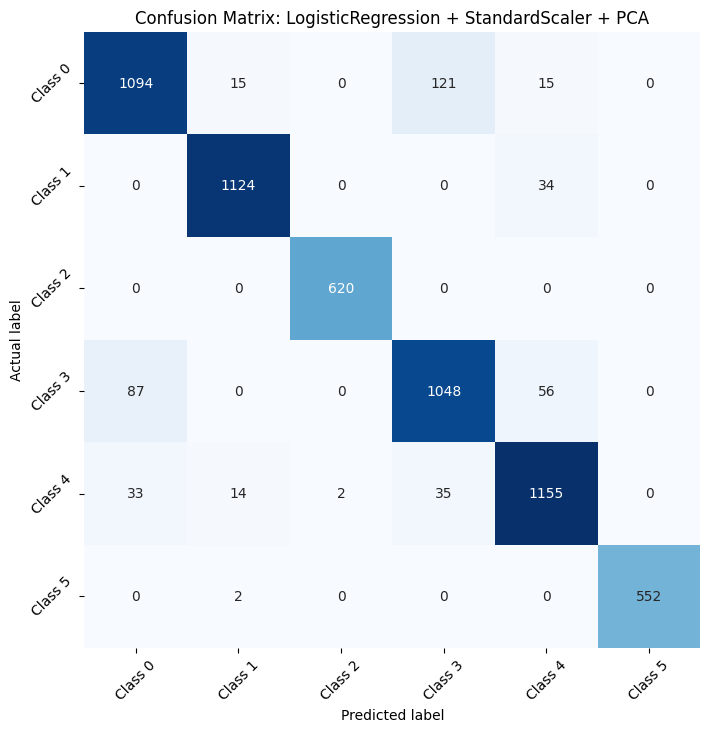

SVC
Accuracy: 0.9713667388047278
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.90      0.96      0.93      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.97      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.97      0.97      0.97      6007



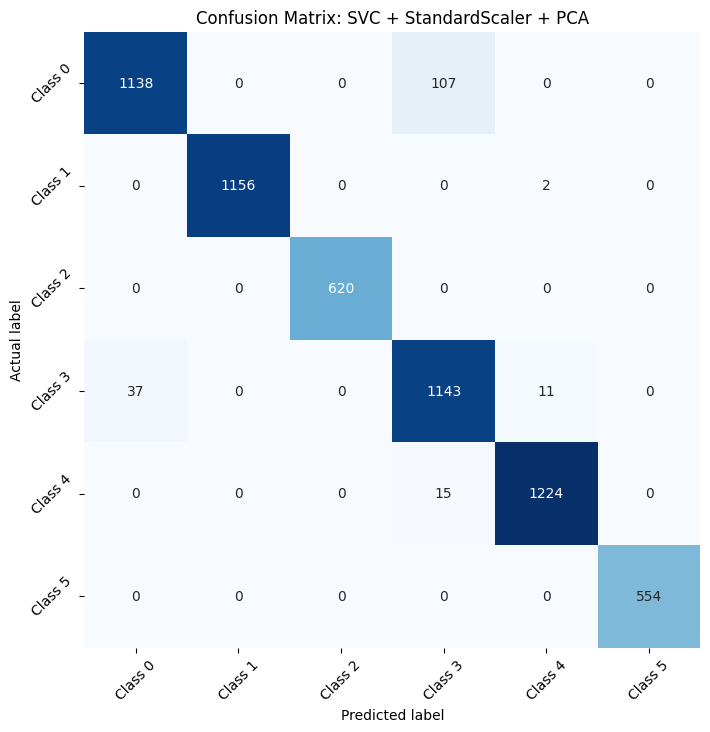

---KNN---
Accuracy: 0.9756950224737806
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1245
           1       0.99      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.94      0.95      0.94      1191
           4       0.98      0.98      0.98      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.98      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.98      0.98      0.98      6007



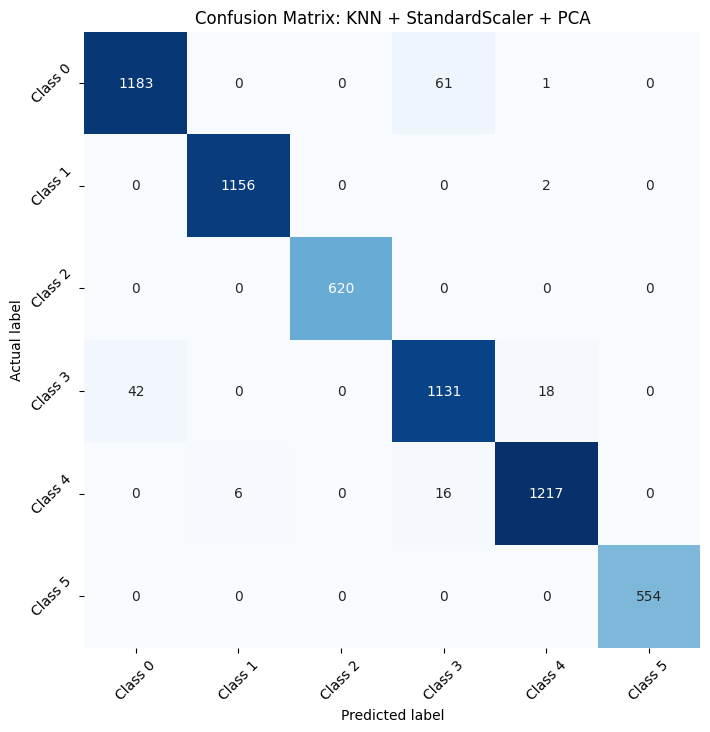

---Gaussian Naive Bayes---
Accuracy: 0.7459630431163642
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70      1245
           1       0.99      0.63      0.77      1158
           2       0.92      0.98      0.95       620
           3       0.53      0.90      0.67      1191
           4       0.92      0.49      0.64      1239
           5       0.99      0.99      0.99       554

    accuracy                           0.75      6007
   macro avg       0.84      0.79      0.79      6007
weighted avg       0.81      0.75      0.75      6007



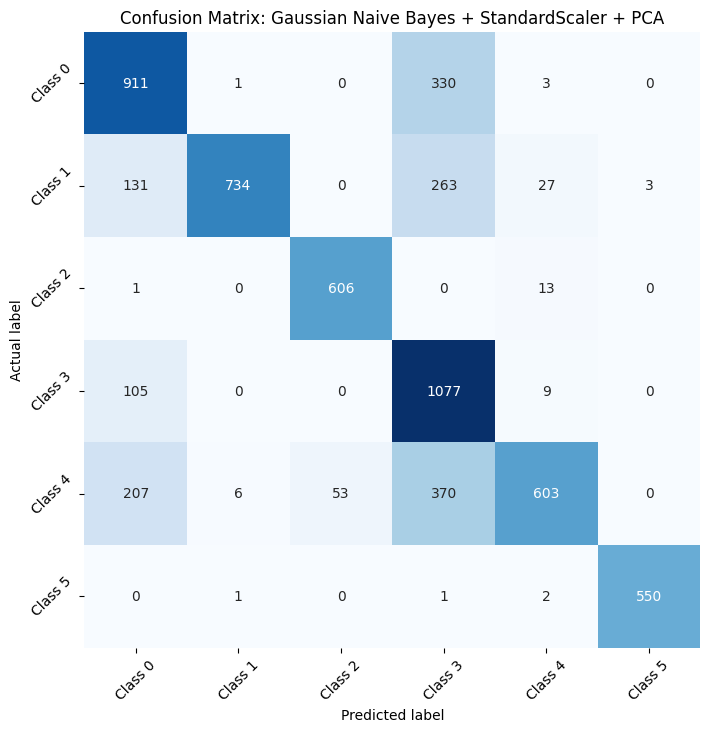

In [ ]:
# LogisticRegression
model = LogisticRegression(max_iter = 10000, random_state=8)
model.fit(X_train_pca_s, y_train)
predictions = model.predict(X_test_pca_s)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'LogisticRegression + StandardScaler + PCA', class_labels)

#SVC
model = SVC(random_state=8)
model.fit(X_train_pca_s, y_train)
predictions = model.predict(X_test_pca_s)

print("SVC")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'SVC + StandardScaler + PCA', class_labels)

# NearestNeighbors
model = KNeighborsClassifier()
model.fit(X_train_pca_s, y_train)
predictions = model.predict(X_test_pca_s)

print("---KNN---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'KNN + StandardScaler + PCA', class_labels)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_pca_s, y_train)
predictions = model.predict(X_test_pca_s)

print("---Gaussian Naive Bayes---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Gaussian Naive Bayes + StandardScaler + PCA', class_labels)

Train a models with LDA

Min Max Scaled

LogisticRegression
Accuracy: 0.9968370234726153
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.99      0.99      0.99      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           1.00      6007
   macro avg       1.00      1.00      1.00      6007
weighted avg       1.00      1.00      1.00      6007



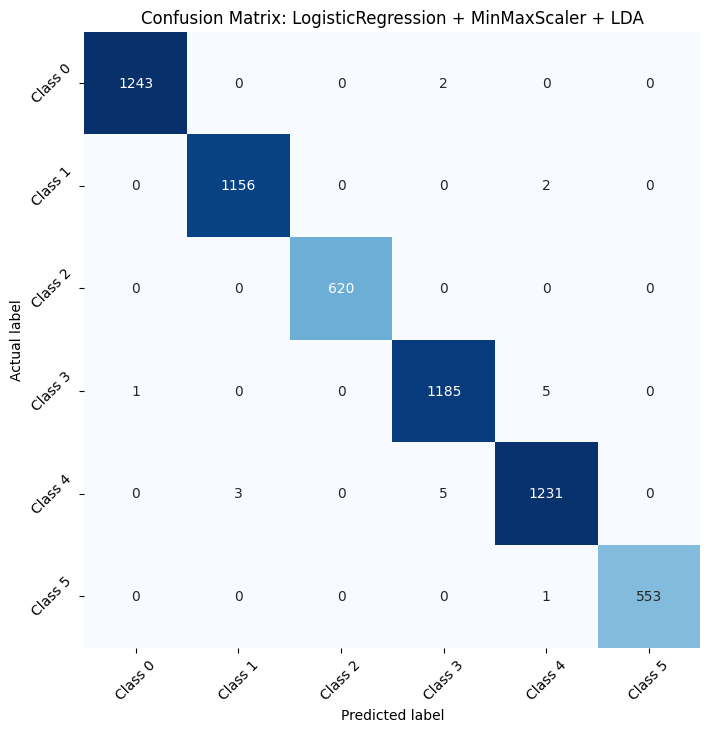

SVC
Accuracy: 0.997003495921425
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       1.00      0.99      1.00      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           1.00      6007
   macro avg       1.00      1.00      1.00      6007
weighted avg       1.00      1.00      1.00      6007



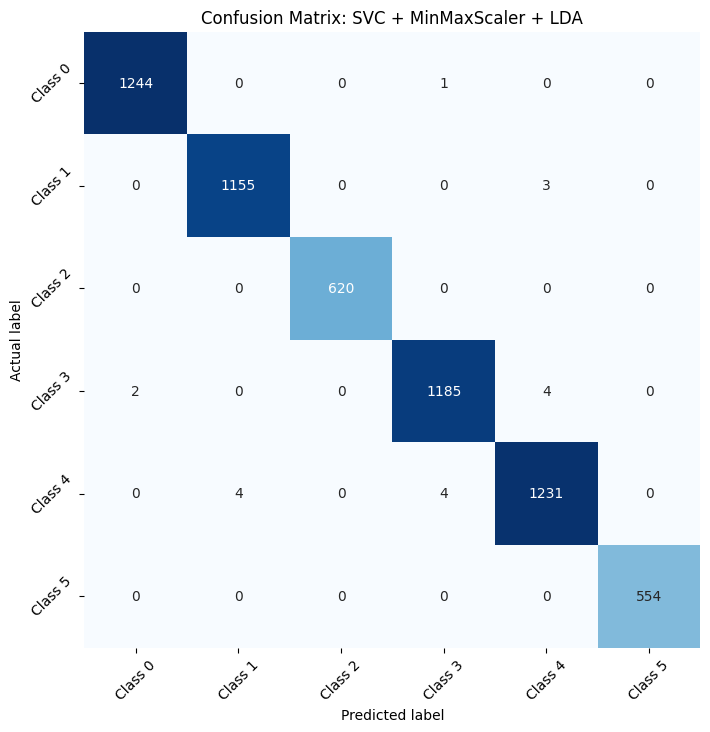

---KNN---
Accuracy: 0.9965040785749958
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       1.00      0.99      0.99      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           1.00      6007
   macro avg       1.00      1.00      1.00      6007
weighted avg       1.00      1.00      1.00      6007



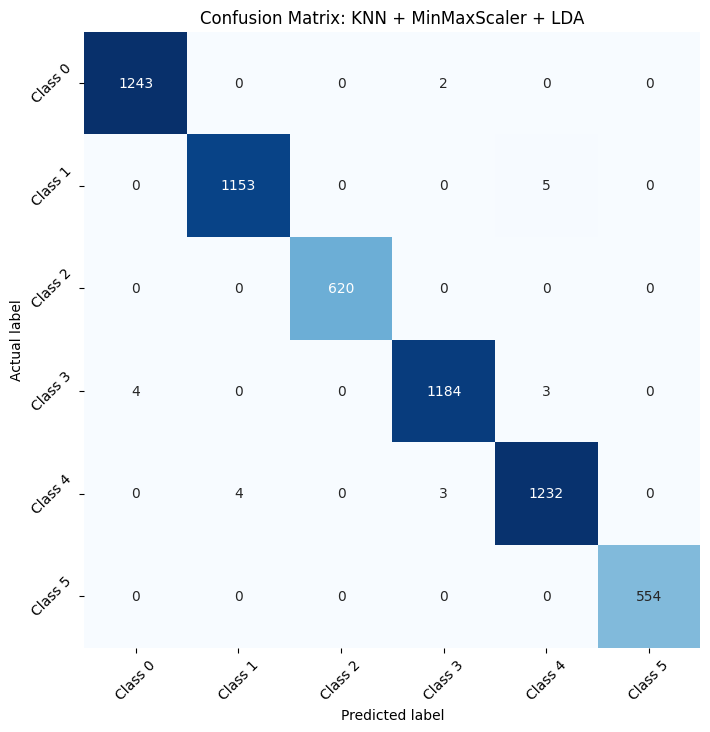

---Gaussian Naive Bayes---
Accuracy: 0.9961711336773764
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.99      1.00      0.99      1191
           4       1.00      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           1.00      6007
   macro avg       1.00      1.00      1.00      6007
weighted avg       1.00      1.00      1.00      6007



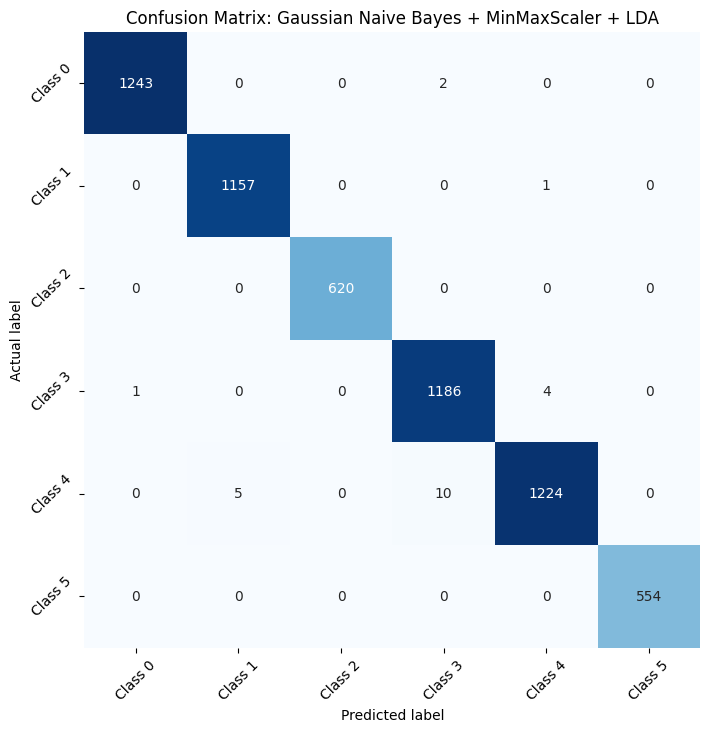

In [ ]:
# LogisticRegression
model = LogisticRegression(max_iter = 10000, random_state=8)
model.fit(X_train_lda_m, y_train)
predictions = model.predict(X_test_lda_m)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'LogisticRegression + MinMaxScaler + LDA', class_labels)

#SVC
model = SVC(random_state=8)
model.fit(X_train_lda_m, y_train)
predictions = model.predict(X_test_lda_m)

print("SVC")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'SVC + MinMaxScaler + LDA', class_labels)

# NearestNeighbors
model = KNeighborsClassifier()
model.fit(X_train_lda_m, y_train)
predictions = model.predict(X_test_lda_m)

print("---KNN---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'KNN + MinMaxScaler + LDA', class_labels)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_lda_m, y_train)
predictions = model.predict(X_test_lda_m)

print("---Gaussian Naive Bayes---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Gaussian Naive Bayes + MinMaxScaler + LDA', class_labels)

Standard Scaled

LogisticRegression
Accuracy: 0.9968370234726153
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.99      0.99      0.99      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           1.00      6007
   macro avg       1.00      1.00      1.00      6007
weighted avg       1.00      1.00      1.00      6007



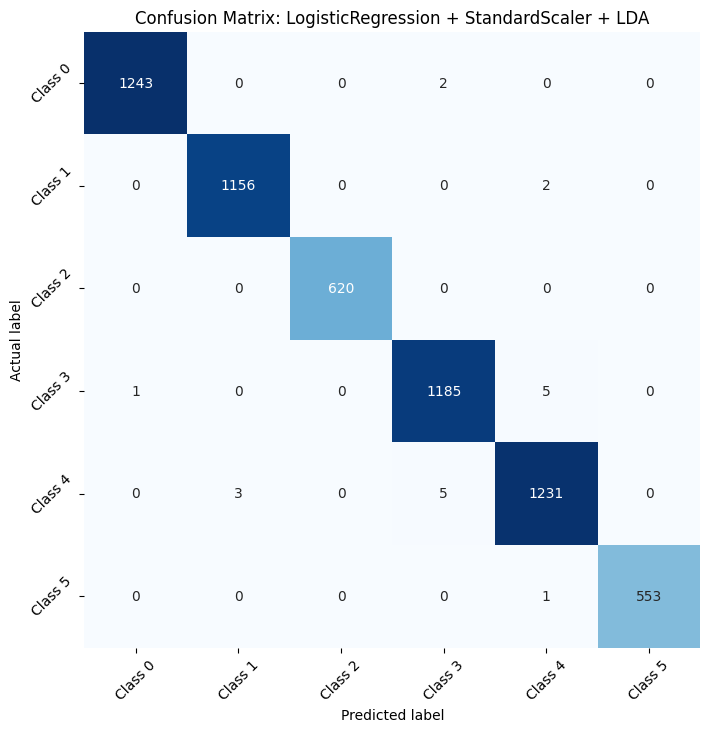

SVC
Accuracy: 0.997003495921425
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       1.00      0.99      1.00      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           1.00      6007
   macro avg       1.00      1.00      1.00      6007
weighted avg       1.00      1.00      1.00      6007



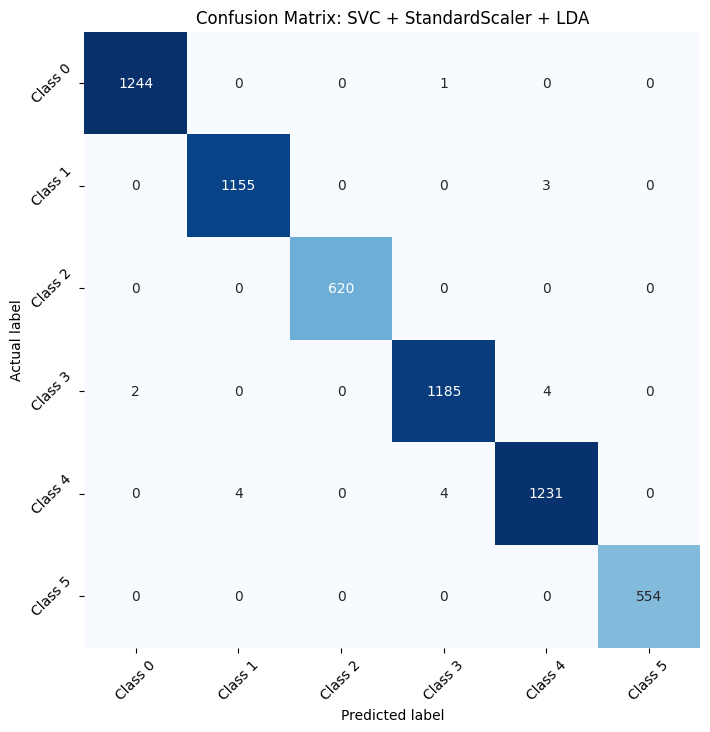

---KNN---
Accuracy: 0.9965040785749958
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       1.00      0.99      0.99      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           1.00      6007
   macro avg       1.00      1.00      1.00      6007
weighted avg       1.00      1.00      1.00      6007



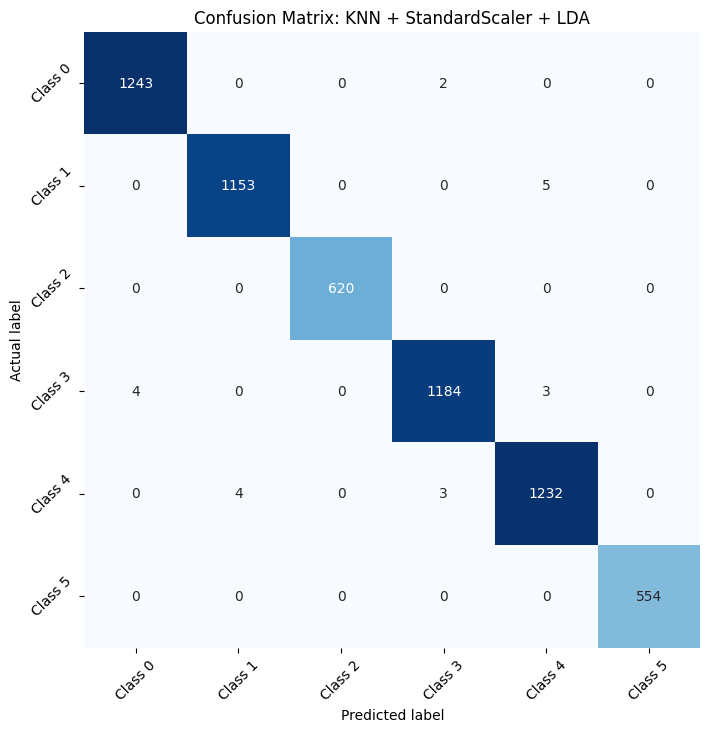

---Gaussian Naive Bayes---
Accuracy: 0.9961711336773764
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.99      1.00      0.99      1191
           4       1.00      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           1.00      6007
   macro avg       1.00      1.00      1.00      6007
weighted avg       1.00      1.00      1.00      6007



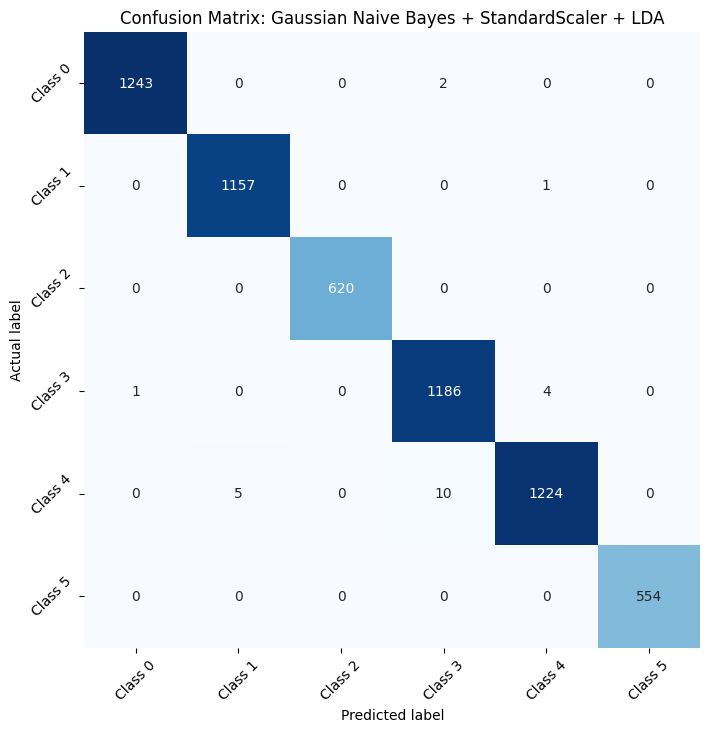

In [ ]:
# LogisticRegression
model = LogisticRegression(max_iter = 10000, random_state=8)
model.fit(X_train_lda_s, y_train)
predictions = model.predict(X_test_lda_s)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'LogisticRegression + StandardScaler + LDA', class_labels)

#SVC
model = SVC(random_state=8)
model.fit(X_train_lda_s, y_train)
predictions = model.predict(X_test_lda_s)

print("SVC")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'SVC + StandardScaler + LDA', class_labels)

# NearestNeighbors
model = KNeighborsClassifier()
model.fit(X_train_lda_s, y_train)
predictions = model.predict(X_test_lda_s)

print("---KNN---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'KNN + StandardScaler + LDA', class_labels)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_lda_s, y_train)
predictions = model.predict(X_test_lda_s)

print("---Gaussian Naive Bayes---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Gaussian Naive Bayes + StandardScaler + LDA', class_labels)

Train models with KernelPCA

Min Max Scaled

LogisticRegression
Accuracy: 0.9683702347261528
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1245
           1       0.99      0.99      0.99      1158
           2       1.00      1.00      1.00       620
           3       0.93      0.93      0.93      1191
           4       0.96      0.99      0.97      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.97      6007
   macro avg       0.97      0.97      0.97      6007
weighted avg       0.97      0.97      0.97      6007



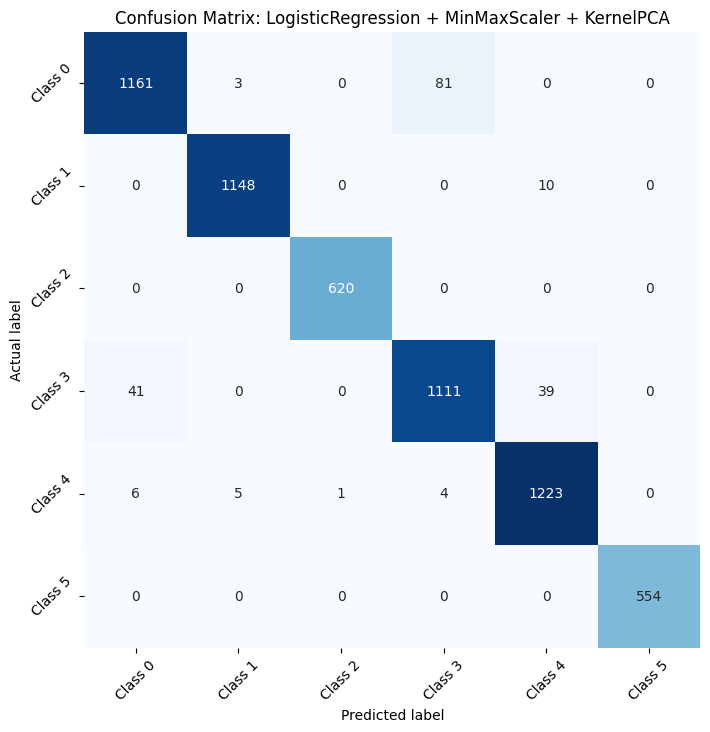

SVC
Accuracy: 0.9761944398202097
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.91      0.98      0.94      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.98      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.98      0.98      0.98      6007



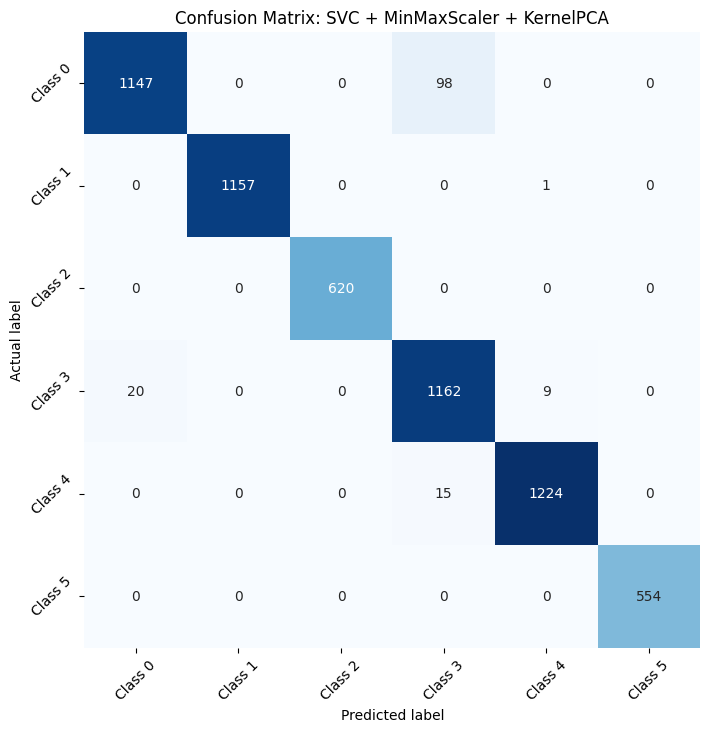

---KNN---
Accuracy: 0.983852172465457
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.95      0.97      0.96      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.98      6007
   macro avg       0.99      0.99      0.99      6007
weighted avg       0.98      0.98      0.98      6007



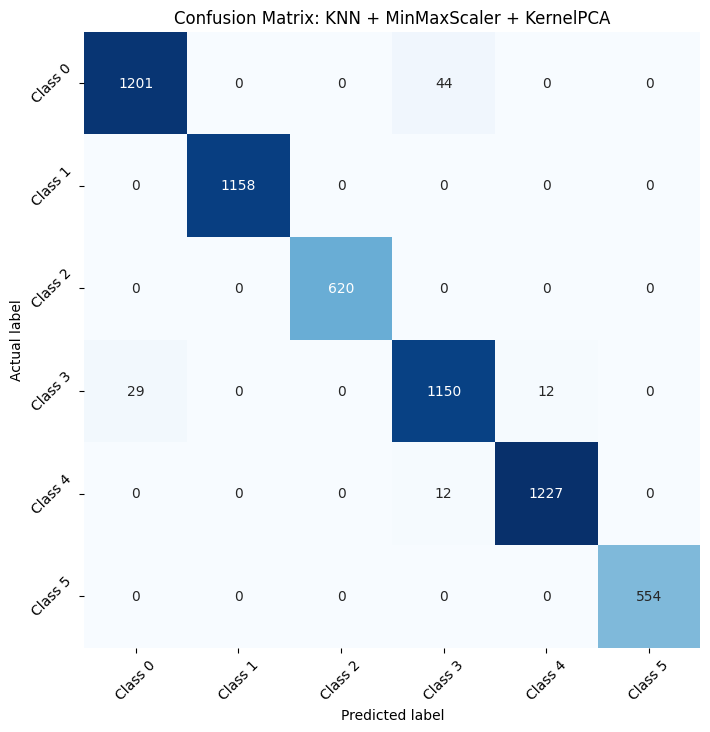

---Gaussian Naive Bayes---
Accuracy: 0.4731146995172299
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.99      0.61      1245
           1       1.00      0.00      0.00      1158
           2       0.34      1.00      0.51       620
           3       0.53      0.36      0.43      1191
           4       0.50      0.00      0.00      1239
           5       1.00      0.99      1.00       554

    accuracy                           0.47      6007
   macro avg       0.64      0.56      0.42      6007
weighted avg       0.62      0.47      0.36      6007



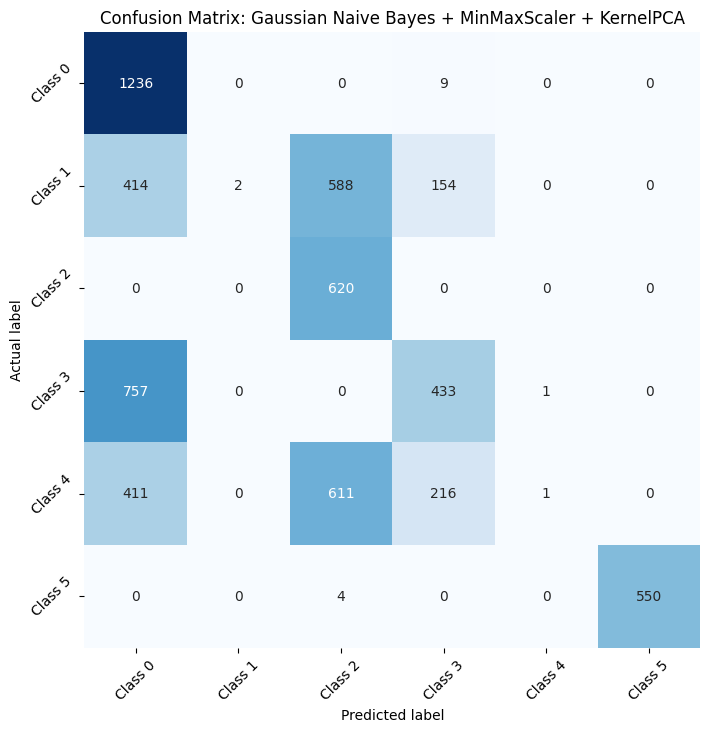

In [ ]:
# LogisticRegression
model = LogisticRegression(max_iter = 10000, random_state=8)
model.fit(X_train_kpca_m, y_train)
predictions = model.predict(X_test_kpca_m)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'LogisticRegression + MinMaxScaler + KernelPCA', class_labels)

#SVC
model = SVC(random_state=8)
model.fit(X_train_kpca_m, y_train)
predictions = model.predict(X_test_kpca_m)

print("SVC")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'SVC + MinMaxScaler + KernelPCA', class_labels)

# NearestNeighbors
model = KNeighborsClassifier()
model.fit(X_train_kpca_m, y_train)
predictions = model.predict(X_test_kpca_m)

print("---KNN---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'KNN + MinMaxScaler + KernelPCA', class_labels)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_kpca_m, y_train)
predictions = model.predict(X_test_kpca_m)

print("---Gaussian Naive Bayes---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Gaussian Naive Bayes + MinMaxScaler + KernelPCA', class_labels)

Standard Scaled

LogisticRegression
Accuracy: 0.977193274513068
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1245
           1       0.99      0.99      0.99      1158
           2       1.00      1.00      1.00       620
           3       0.96      0.95      0.95      1191
           4       0.97      0.99      0.98      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.98      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.98      0.98      0.98      6007



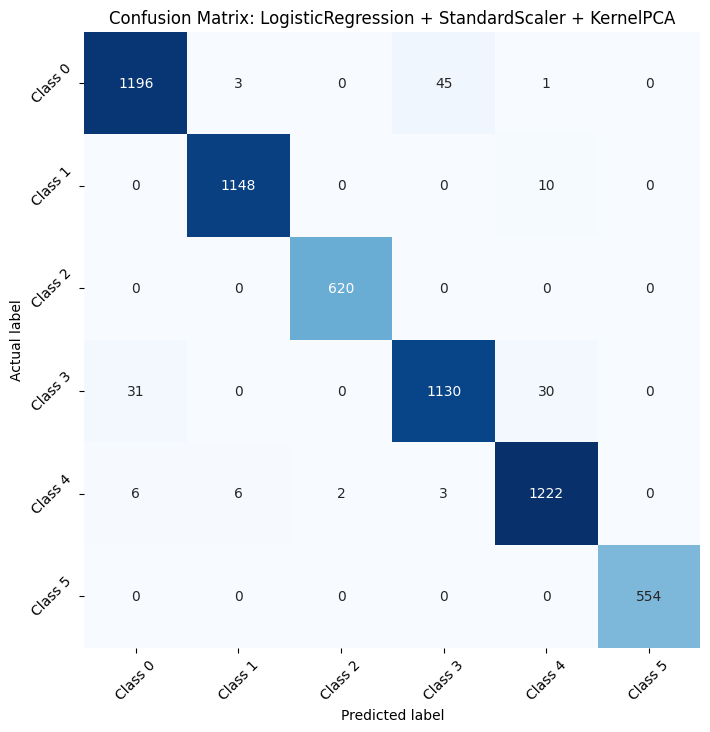

SVC
Accuracy: 0.9736973530880639
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.91      0.97      0.94      1191
           4       0.99      0.99      0.99      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.97      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.97      0.97      0.97      6007



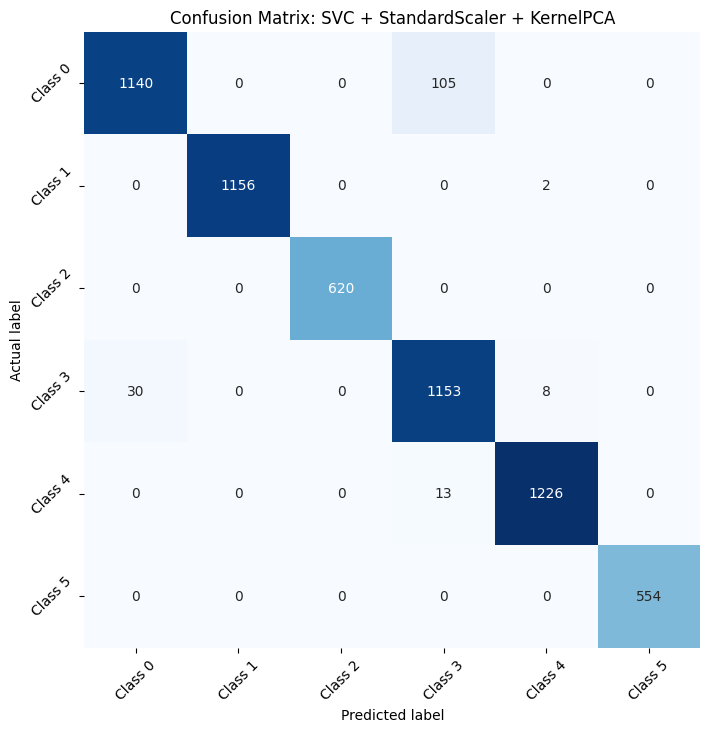

---KNN---
Accuracy: 0.9753620775761611
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1245
           1       0.99      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.93      0.95      0.94      1191
           4       0.98      0.98      0.98      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.98      6007
   macro avg       0.98      0.98      0.98      6007
weighted avg       0.98      0.98      0.98      6007



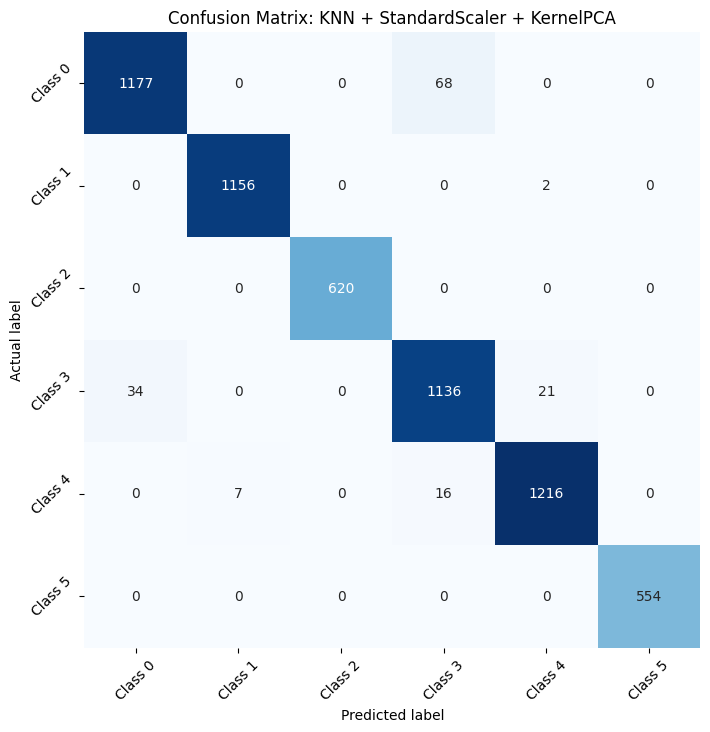

---Gaussian Naive Bayes---
Accuracy: 0.4801065423672382
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.98      0.61      1245
           1       0.90      0.01      0.02      1158
           2       0.34      1.00      0.51       620
           3       0.53      0.40      0.45      1191
           4       1.00      0.01      0.01      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.48      6007
   macro avg       0.70      0.56      0.43      6007
weighted avg       0.71      0.48      0.37      6007



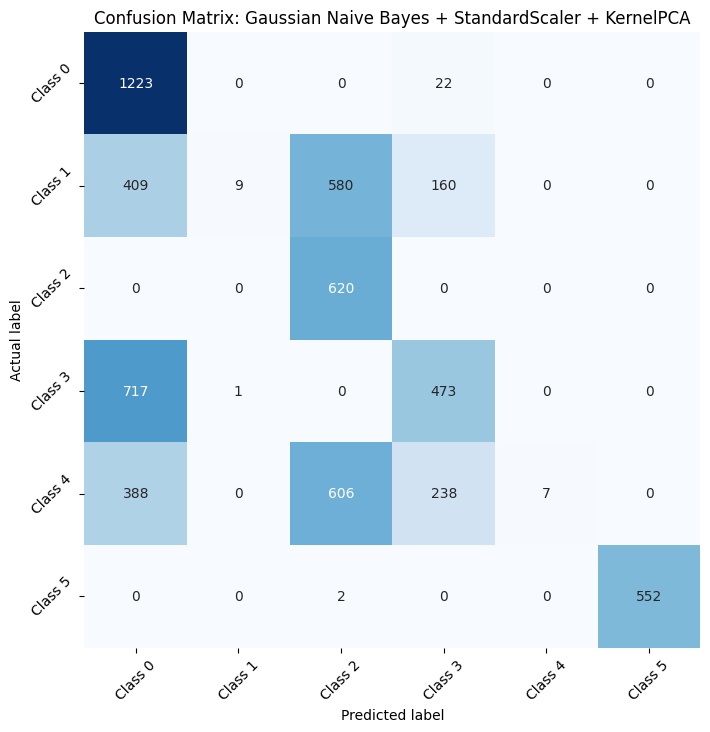

In [ ]:
# LogisticRegression
model = LogisticRegression(max_iter = 10000, random_state=8)
model.fit(X_train_kpca_s, y_train)
predictions = model.predict(X_test_kpca_s)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'LogisticRegression + StandardScaler + KernelPCA', class_labels)

#SVC
model = SVC(random_state=8)
model.fit(X_train_kpca_s, y_train)
predictions = model.predict(X_test_kpca_s)

print("SVC")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'SVC + StandardScaler + KernelPCA', class_labels)

# NearestNeighbors
model = KNeighborsClassifier()
model.fit(X_train_kpca_s, y_train)
predictions = model.predict(X_test_kpca_s)

print("---KNN---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'KNN + StandardScaler + KernelPCA', class_labels)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_kpca_s, y_train)
predictions = model.predict(X_test_kpca_s)

print("---Gaussian Naive Bayes---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Gaussian Naive Bayes + StandardScaler + KernelPCA', class_labels)

Train models with Isomap

Min Max Scaled

LogisticRegression
Accuracy: 0.9547194939237557
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1245
           1       0.99      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.88      0.90      0.89      1191
           4       0.96      0.96      0.96      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.95      6007
   macro avg       0.96      0.96      0.96      6007
weighted avg       0.96      0.95      0.95      6007



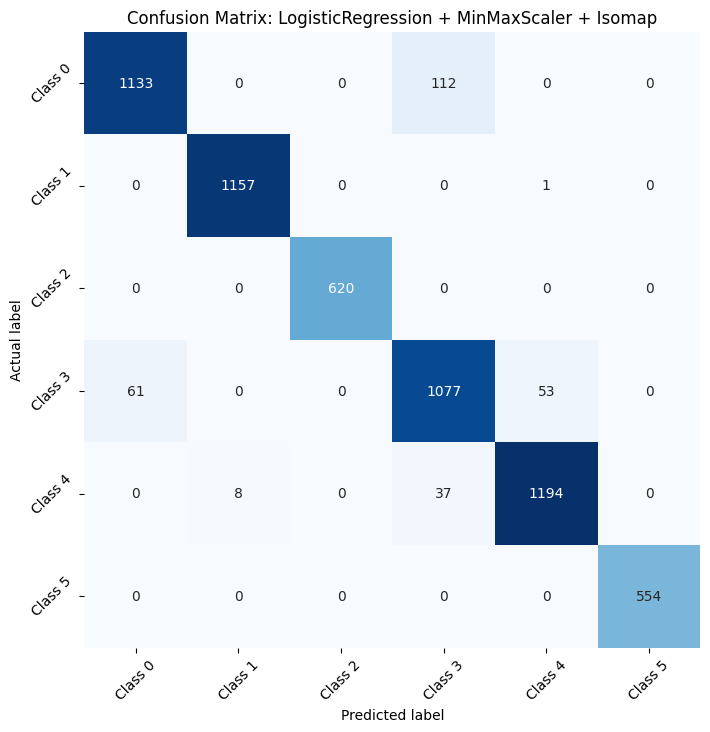

SVC
Accuracy: 0.9633760612618611
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.88      0.94      0.91      1191
           4       0.96      0.98      0.97      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.96      6007
   macro avg       0.97      0.97      0.97      6007
weighted avg       0.96      0.96      0.96      6007



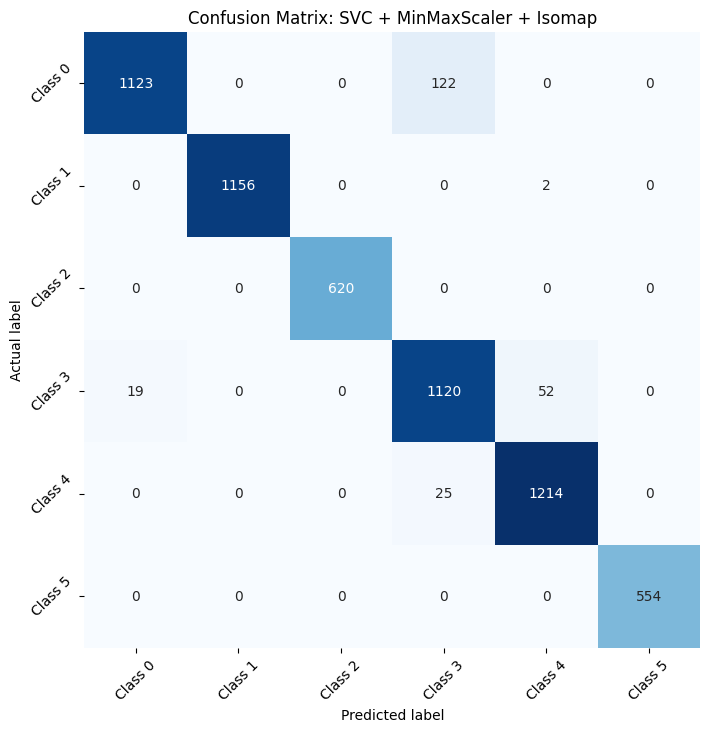

---KNN---
Accuracy: 0.9687031796237723
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1245
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00       620
           3       0.93      0.92      0.92      1191
           4       0.96      0.98      0.97      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.97      6007
   macro avg       0.97      0.97      0.97      6007
weighted avg       0.97      0.97      0.97      6007



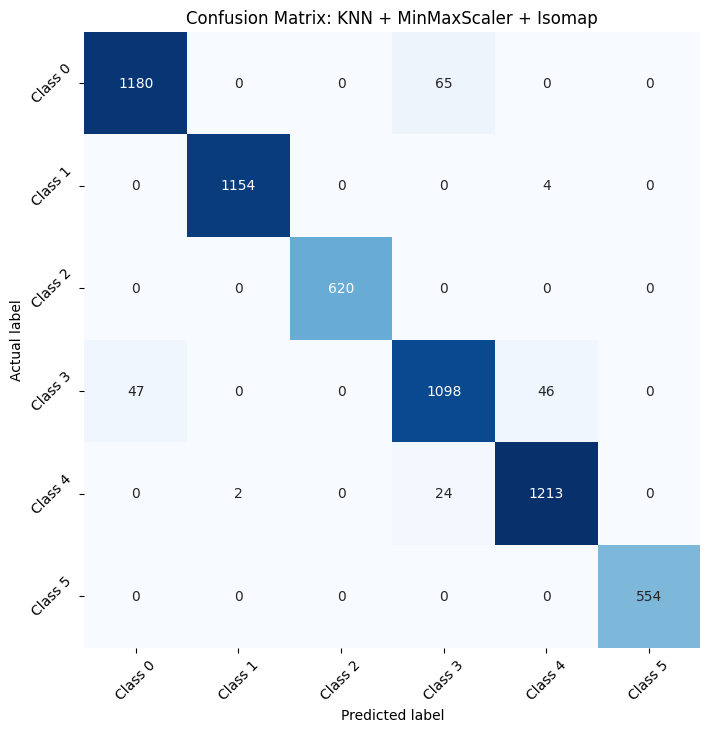

---Gaussian Naive Bayes---
Accuracy: 0.8693191276843683
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      1245
           1       0.92      0.94      0.93      1158
           2       0.99      0.96      0.98       620
           3       0.69      0.89      0.78      1191
           4       0.89      0.68      0.77      1239
           5       0.96      0.96      0.96       554

    accuracy                           0.87      6007
   macro avg       0.90      0.89      0.89      6007
weighted avg       0.88      0.87      0.87      6007



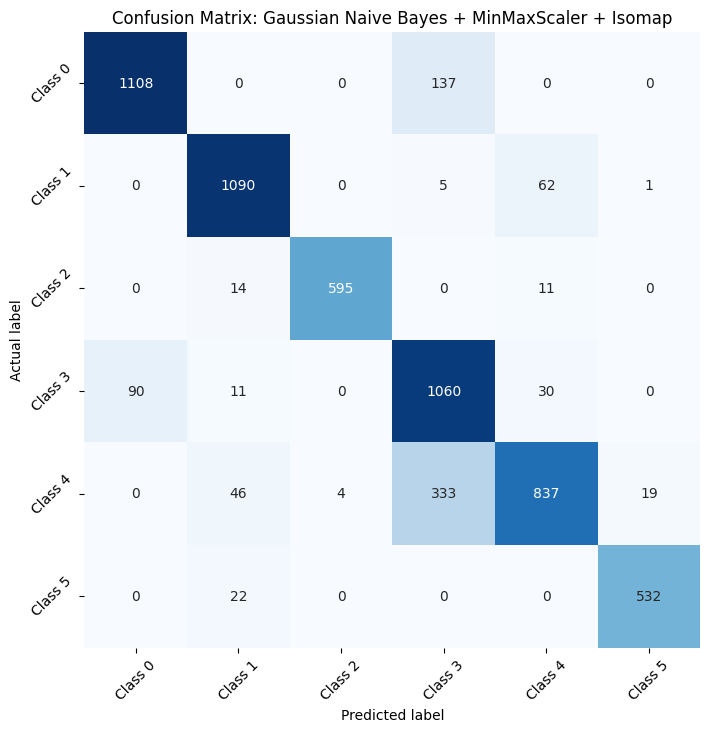

In [ ]:
# LogisticRegression
model = LogisticRegression(max_iter = 10000, random_state=8)
model.fit(X_train_iso_m, y_train)
predictions = model.predict(X_test_iso_m)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'LogisticRegression + MinMaxScaler + Isomap', class_labels)

#SVC
model = SVC(random_state=8)
model.fit(X_train_iso_m, y_train)
predictions = model.predict(X_test_iso_m)

print("SVC")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'SVC + MinMaxScaler + Isomap', class_labels)

# NearestNeighbors
model = KNeighborsClassifier()
model.fit(X_train_iso_m, y_train)
predictions = model.predict(X_test_iso_m)

print("---KNN---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'KNN + MinMaxScaler + Isomap', class_labels)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_iso_m, y_train)
predictions = model.predict(X_test_iso_m)

print("---Gaussian Naive Bayes---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Gaussian Naive Bayes + MinMaxScaler + Isomap', class_labels)

Standard Scaled

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Accuracy: 0.950890627601132
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1245
           1       0.99      1.00      0.99      1158
           2       1.00      1.00      1.00       620
           3       0.87      0.91      0.89      1191
           4       0.96      0.96      0.96      1239
           5       1.00      0.99      1.00       554

    accuracy                           0.95      6007
   macro avg       0.96      0.96      0.96      6007
weighted avg       0.95      0.95      0.95      6007



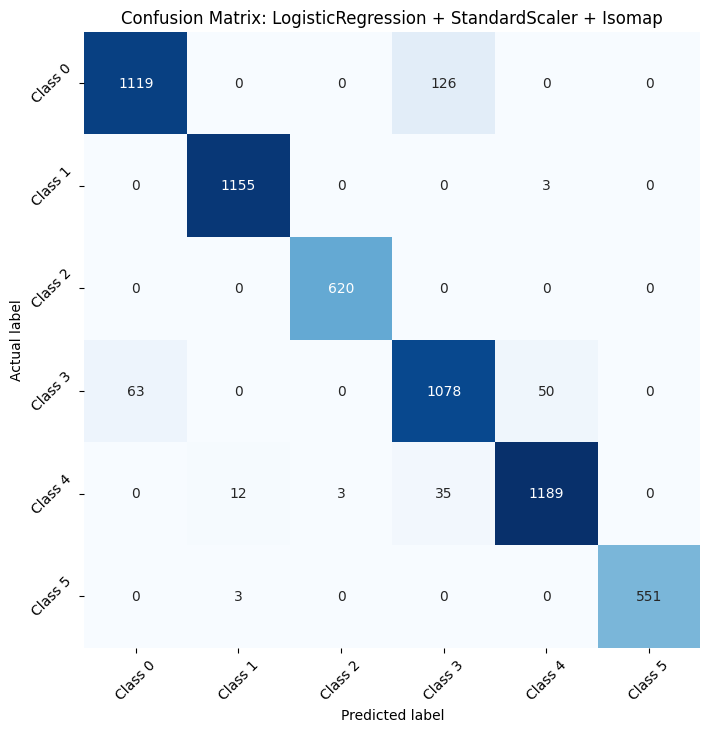

SVC
Accuracy: 0.9590477775928083
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      1245
           1       1.00      0.99      0.99      1158
           2       1.00      1.00      1.00       620
           3       0.88      0.93      0.91      1191
           4       0.95      0.97      0.96      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.96      6007
   macro avg       0.97      0.97      0.97      6007
weighted avg       0.96      0.96      0.96      6007



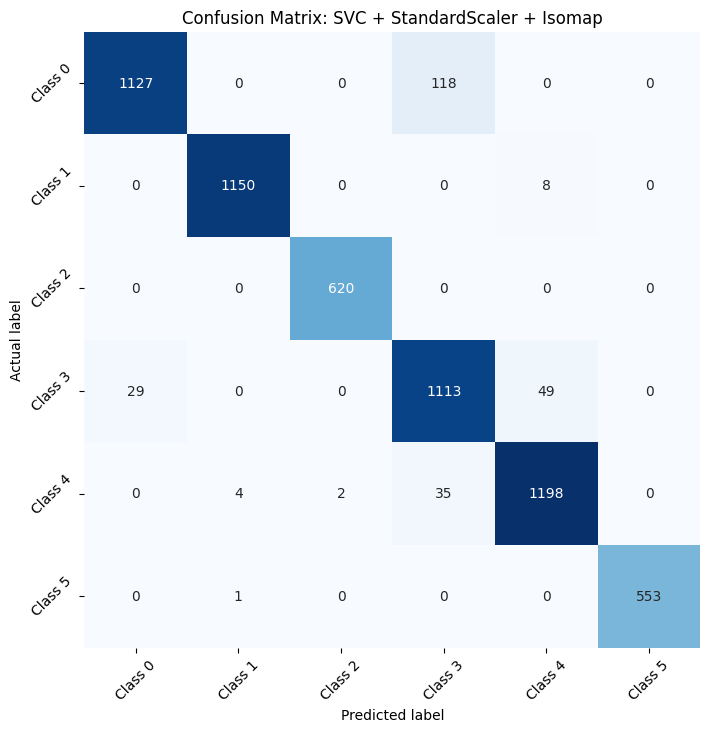

---KNN---
Accuracy: 0.9637090061594806
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1245
           1       0.99      0.99      0.99      1158
           2       1.00      1.00      1.00       620
           3       0.93      0.90      0.91      1191
           4       0.95      0.98      0.96      1239
           5       1.00      1.00      1.00       554

    accuracy                           0.96      6007
   macro avg       0.97      0.97      0.97      6007
weighted avg       0.96      0.96      0.96      6007



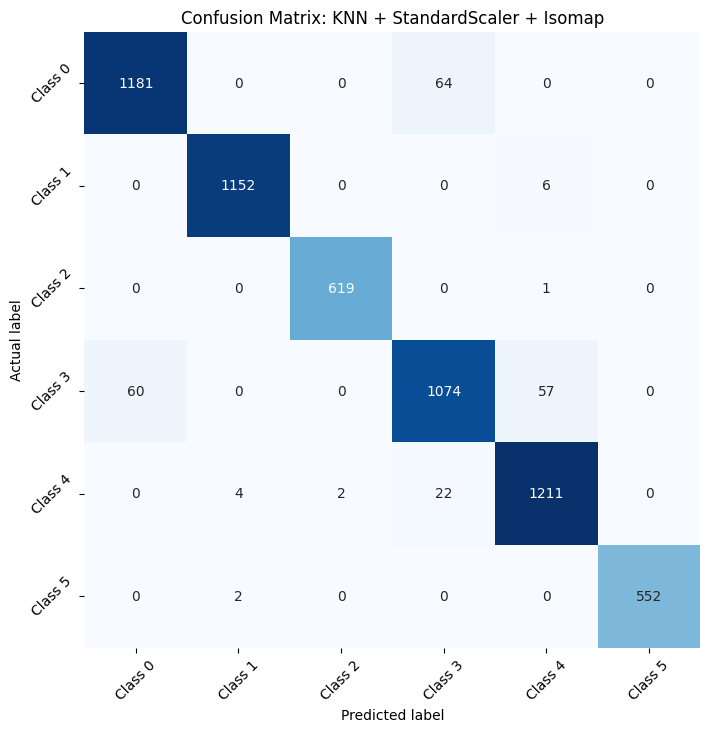

---Gaussian Naive Bayes---
Accuracy: 0.8268686532378892
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      1245
           1       0.97      0.90      0.93      1158
           2       0.97      0.99      0.98       620
           3       0.56      0.93      0.70      1191
           4       0.93      0.55      0.69      1239
           5       1.00      0.99      1.00       554

    accuracy                           0.83      6007
   macro avg       0.89      0.86      0.86      6007
weighted avg       0.88      0.83      0.83      6007



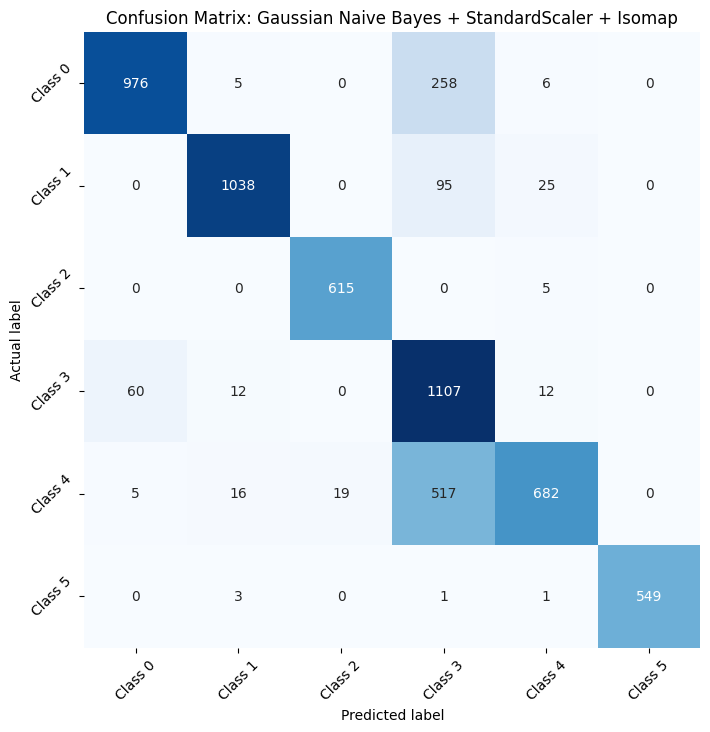

In [ ]:
# LogisticRegression
model = LogisticRegression(max_iter = 10000, random_state=8)
model.fit(X_train_iso_s, y_train)
predictions = model.predict(X_test_iso_s)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'LogisticRegression + StandardScaler + Isomap', class_labels)

#SVC
model = SVC(random_state=8)
model.fit(X_train_iso_s, y_train)
predictions = model.predict(X_test_iso_s)

print("SVC")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'SVC + StandardScaler + Isomap', class_labels)

# NearestNeighbors
model = KNeighborsClassifier()
model.fit(X_train_iso_s, y_train)
predictions = model.predict(X_test_iso_s)

print("---KNN---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'KNN + StandardScaler + Isomap', class_labels)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_iso_s, y_train)
predictions = model.predict(X_test_iso_s)

print("---Gaussian Naive Bayes---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Gaussian Naive Bayes + StandardScaler + Isomap', class_labels)

Сhecking the best combination of methods (Min Max LDA SVM) with the highest accuracy for overfitting the model

In [22]:
from sklearn.model_selection import cross_val_score

# Checking on training data
model = SVC(random_state=8)

# 5-fold cross_val
scores = cross_val_score(model, X_train_lda_m, y_train, cv=5)

print("Accuracy scores for each fold:")
print(scores)
print("\nMean Accuracy: %0.4f" % (scores.mean()))
print("Standard Deviation of Accuracy: %0.4f" % (scores.std()))

Accuracy scores for each fold:
[0.99964324 0.99964324 1.         0.99892972 1.        ]

Mean Accuracy: 0.9996
Standard Deviation of Accuracy: 0.0004


In [23]:
# Checking on all data
scaler = MinMaxScaler()
X_m = scaler.fit_transform(X)

lda_m = LDA(n_components=5)
X_lda_m = lda_m.fit_transform(X_m, y)

model = SVC(random_state=8)

scores = cross_val_score(model, X_lda_m, y, cv=5)

print("Accuracy scores for each fold:")
print(scores)
print("\nMean Accuracy: %0.4f" % (scores.mean()))
print("Standard Deviation of Accuracy: %0.4f" % (scores.std()))

Accuracy scores for each fold:
[0.99925094 0.99900125 0.99975025 0.99975025 0.99925075]

Mean Accuracy: 0.9994
Standard Deviation of Accuracy: 0.0003


Neural network test

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

y = df.iloc[:, -1]
yy = to_categorical(y, num_classes=6)
X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state=8, shuffle=True)

In [34]:
print("Transformed y shape:", yy.shape)

Transformed y shape: (20022, 6)


In [35]:
# Создание модели
model = Sequential()
model.add(Dense(512, input_shape=(2048,), activation='relu'))  # Входной слой с 512 нейронами
model.add(Dense(256, activation='relu'))  # Скрытый слой с 256 нейронами
model.add(Dense(128, activation='relu'))  # Еще один скрытый слой с 128 нейронами
model.add(Dense(6, activation='softmax'))  # Выходной слой с 6 нейронами и softmax активацией

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.4f}%")

Epoch 1/30
438/438 [==============================] - 17s 35ms/step - loss: 13.6648 - accuracy: 0.5455 - val_loss: 1.3543 - val_accuracy: 0.6534
Epoch 2/30
438/438 [==============================] - 9s 21ms/step - loss: 1.1243 - accuracy: 0.6903 - val_loss: 0.6807 - val_accuracy: 0.7393
Epoch 3/30
438/438 [==============================] - 16s 36ms/step - loss: 0.6468 - accuracy: 0.7522 - val_loss: 0.5681 - val_accuracy: 0.7718
Epoch 4/30
438/438 [==============================] - 15s 34ms/step - loss: 0.5698 - accuracy: 0.7833 - val_loss: 0.6500 - val_accuracy: 0.7450
Epoch 5/30
438/438 [==============================] - 14s 33ms/step - loss: 0.4257 - accuracy: 0.8247 - val_loss: 0.4450 - val_accuracy: 0.8320
Epoch 6/30
438/438 [==============================] - 10s 24ms/step - loss: 0.4608 - accuracy: 0.8192 - val_loss: 0.6798 - val_accuracy: 0.7510
Epoch 7/30
438/438 [==============================] - 10s 22ms/step - loss: 0.4143 - accuracy: 0.8372 - val_loss: 0.3727 - val_accuracy:

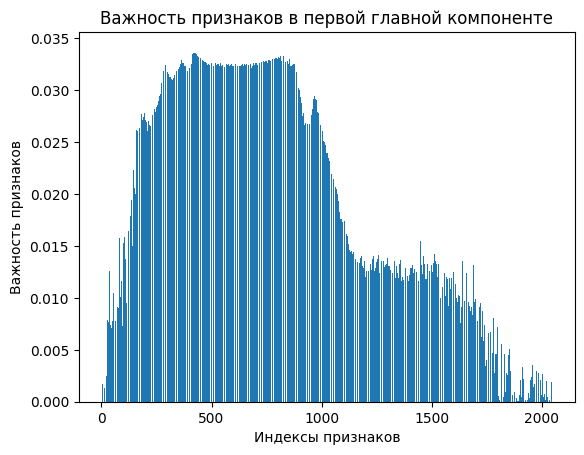

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=180)
pca.fit(X_train_m)
features_importance = pca.components_[0]
total_importance = np.sum(pca.components_ ** 2 * pca.explained_variance_[:, np.newaxis], axis=0)
import matplotlib.pyplot as plt

plt.bar(range(len(features_importance)), np.abs(features_importance))
plt.xlabel('Индексы признаков')
plt.ylabel('Важность признаков')
plt.title('Важность признаков в первой главной компоненте')
plt.show()